In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
df = pd.read_parquet("E:\\parquet\\parsed_data\\fsc-h_fsc-a\\KP.3.1.1_58-18-57-Fc_D9_bb677317-ce99-11f0-9b2d-f02f74d321c5_filtered_filtered.parquet")
df

# train_df = pd.read_parquet(Path("E:\\parquet\\parsed_data\\fsc-h_fsc-a\\KP.3.1.1_58-18-57-Fc_D9_bb677317-ce99-11f0-9b2d-f02f74d321c5_filtered_filtered.parquet")).dropna()
# test_df = pd.read_parquet(Path("E:\\parquet\\parsed_data\\fsc-h_fsc-a\\KP.2_KiH-7-57_8_1584903b-ce9a-11f0-b757-f02f74d321c5_filtered_filtered.parquet")).dropna()

,FSC-H,SSC-H,FSC-A,SSC-A,FITC-A,Width,Time,label,FITC_raw,FITC_log10,FITC_asinh,FITC_pct,FITC_z_robust,FSC_ratio,SSC_ratio,Area_to_Width,Time_norm,gmm_prob_infected,cluster_label
0,4279004.0,301239.0,2635641.0,139647.0,19950.0,89.0,0.000138,False,19950.0,4.299965,3.687004,0.207850,-1.060203,0.615947,0.463575,29613.943820,0.000000,0.057861,0
1,5677100.0,437457.0,3748594.0,246328.0,45875.0,89.0,0.000246,False,45875.0,4.661586,4.519186,0.752486,1.212219,0.660301,0.563091,42119.033707,0.000002,0.155412,0
3,4993446.0,257077.0,3087473.0,122847.0,48347.0,94.0,0.003407,False,48347.0,4.684379,4.571658,0.770727,1.355450,0.618305,0.477861,32845.457446,0.000063,0.182326,0
4,5727793.0,349424.0,3511803.0,186122.0,29545.0,98.0,0.005109,False,29545.0,4.470499,4.079348,0.503388,0.011431,0.613116,0.532654,35834.724489,0.000096,0.061236,0
5,2767273.0,215137.0,1575384.0,90742.0,17083.0,79.0,0.007205,False,17083.0,4.232590,3.532087,0.123989,-1.483587,0.569291,0.421787,19941.569620,0.000137,0.069848,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38809,2921040.0,153964.0,1992921.0,89936.0,60873.0,84.0,51.737220,False,60873.0,4.784432,4.802004,0.823221,1.984184,0.682264,0.584137,23725.250000,0.999864,0.381080,0
38810,4726110.0,376797.0,2959063.0,167723.0,22089.0,87.0,51.740684,False,22089.0,4.344196,3.788739,0.277232,-0.782255,0.626110,0.445128,34012.218390,0.999931,0.054534,0
38811,5481322.0,315995.0,3427462.0,148657.0,23005.0,97.0,51.742148,False,23005.0,4.361841,3.829331,0.307209,-0.671372,0.625298,0.470441,35334.659793,0.999959,0.054035,0
38812,3704890.0,330944.0,2145892.0,152906.0,20669.0,74.0,51.742236,False,20669.0,4.315340,3.722367,0.231630,-0.963581,0.579205,0.462030,28998.540540,0.999961,0.056351,0


In [84]:
df[["FSC-H","SSC-H", "FSC-A", "SSC-A", "FITC-A", "Width", "Time", "label"]]

,FSC-H,SSC-H,FSC-A,SSC-A,FITC-A,Width,Time,label
0,4279004.0,301239.0,2635641.0,139647.0,19950.0,89.0,0.000138,False
1,5677100.0,437457.0,3748594.0,246328.0,45875.0,89.0,0.000246,False
3,4993446.0,257077.0,3087473.0,122847.0,48347.0,94.0,0.003407,False
4,5727793.0,349424.0,3511803.0,186122.0,29545.0,98.0,0.005109,False
5,2767273.0,215137.0,1575384.0,90742.0,17083.0,79.0,0.007205,False
...,...,...,...,...,...,...,...,...
38809,2921040.0,153964.0,1992921.0,89936.0,60873.0,84.0,51.737220,False
38810,4726110.0,376797.0,2959063.0,167723.0,22089.0,87.0,51.740684,False
38811,5481322.0,315995.0,3427462.0,148657.0,23005.0,97.0,51.742148,False
38812,3704890.0,330944.0,2145892.0,152906.0,20669.0,74.0,51.742236,False


In [85]:
df_label_0 = df[df["label"] == 0]
df_label_1 = df[df["label"] == 1]

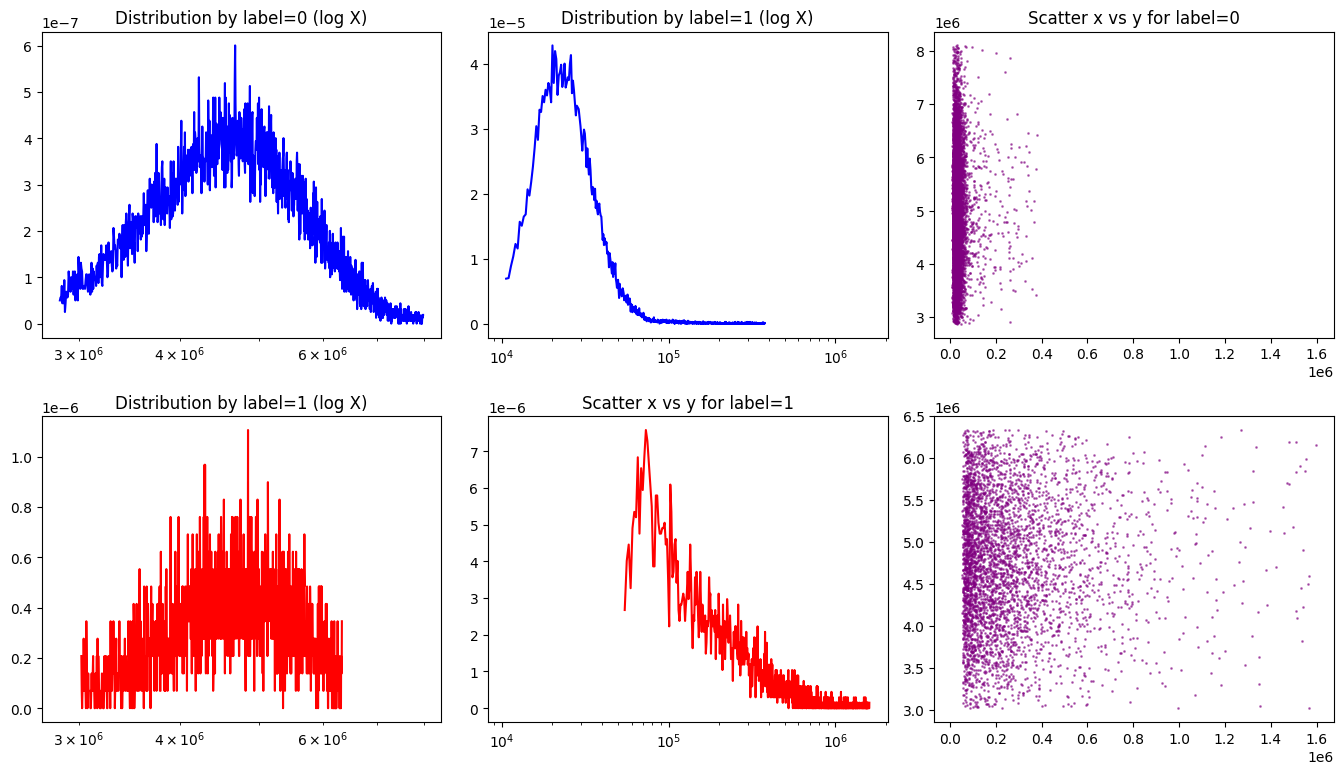

In [86]:
def clip_outliers(arr, lower_percentile=1, upper_percentile=99):
    low = np.percentile(arr, lower_percentile)
    high = np.percentile(arr, upper_percentile)
    return arr[(arr >= low) & (arr <= high)]

def plot_distributions_and_scatter(x, y, a, b, x_scatter_label_0, y_scatter_label_0, x_scatter_label_1, y_scatter_label_1, bins=1000):
    # --- считаем гистограммы ---
    p_hist, p_bins = np.histogram(x, bins=bins, density=True)
    q_hist, q_bins = np.histogram(y, bins=bins, density=True)

    # добавим маленькую константу
    p = p_hist + 1e-12
    q = q_hist + 1e-12

    # центры бинов для оси X
    p_centers = 0.5 * (p_bins[:-1] + p_bins[1:])
    q_centers = 0.5 * (q_bins[:-1] + q_bins[1:])

    a_hist, a_bins = np.histogram(a, bins=bins, density=True)
    b_hist, b_bins = np.histogram(b, bins=bins, density=True)

    # добавим маленькую константу
    a = a_hist + 1e-12
    b = b_hist + 1e-12

    # центры бинов для оси X
    a_centers = 0.5 * (a_bins[:-1] + a_bins[1:])
    b_centers = 0.5 * (b_bins[:-1] + b_bins[1:])

    # --- создаём 3 сабплота ---
    fig = plt.figure(figsize=(18, 8))
    gs = fig.add_gridspec(2, 4, width_ratios=[1, 1, 1, 1])

    ax1 = fig.add_subplot(gs[0, 0])   # верхний левый
    ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)   # нижний левый
    ax3 = fig.add_subplot(gs[0, 1])   # правый (scatter)
    ax4 = fig.add_subplot(gs[1, 1], sharex=ax3)   # правый (scatter)
    ax5 = fig.add_subplot(gs[0, 2])
    ax6 = fig.add_subplot(gs[1, 2], sharex=ax5)

    # --- 1: верхняя линия ---
    ax1.plot(p_centers, p, color='blue')
    ax1.set_title("Distribution by label=0 (log X)")
    ax1.set_xscale("log")

    # --- 2: нижняя линия ---
    ax2.plot(q_centers, q, color='red')
    ax2.set_title("Distribution by label=1 (log X)")
    ax2.set_xscale("log")

    # --- 3: двойной scatter ---
    ax3.plot(a_centers, a, color='blue')
    ax3.set_title("Distribution by label=1 (log X)")
    ax3.set_xscale("log")

    ax4.plot(b_centers, b, color='red')
    ax4.set_title("Distribution by label=1 (log X)")
    ax4.set_xscale("log")

    ax5.scatter(x_scatter_label_0, y_scatter_label_0, s=1, alpha=0.5, color='purple')
    ax5.set_title("Scatter x vs y for label=0")

    ax6.scatter(x_scatter_label_1, y_scatter_label_1, s=1, alpha=0.5, color='purple')
    ax4.set_title("Scatter x vs y for label=1")

    plt.tight_layout()
    plt.show()

low_percentile=1
high_persentile=99

plot_distributions_and_scatter(
    clip_outliers(df_label_0["FSC-H"].values, low_percentile, high_persentile), 
    clip_outliers(df_label_1["FSC-H"].values, low_percentile, high_persentile), 
    clip_outliers(df_label_0["FITC-A"].values, low_percentile, high_persentile), 
    clip_outliers(df_label_1["FITC-A"].values, low_percentile, high_persentile),
    clip_outliers(df_label_0["FITC-A"].values[:10000], low_percentile, high_persentile), 
    clip_outliers(df_label_0["FSC-H"].values[:10000], low_percentile, high_persentile), 
    clip_outliers(df_label_1["FITC-A"].values[:10000], low_percentile, high_persentile), 
    clip_outliers(df_label_1["FSC-H"].values[:10000], low_percentile, high_persentile),
    )

In [87]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import RobustScaler
from scipy.stats import gaussian_kde
from scipy.ndimage import gaussian_filter, label
import matplotlib.pyplot as plt

def select_central_cluster_by_centroid(clusters, XYs):
    """Выбрать кластер, чей центроид ближе всего к медиане всего набора (т.е. 'центральный')."""
    unique = np.unique(clusters)
    unique = unique[unique != -1]  # -1 = шум для DBSCAN
    if len(unique) == 0:
        return None
    global_med = np.median(XYs, axis=0)
    best = None
    best_dist = np.inf
    for u in unique:
        mask = clusters == u
        centroid = XYs[mask].mean(axis=0)
        d = np.linalg.norm(centroid - global_med)
        if d < best_dist:
            best_dist = d
            best = u
    return best

def filter_by_dbscan(x, y, eps=0.05, min_samples=50, **pre_kwargs):
    print(x)
    print(y)
    XYs, x_trim, y_trim, scaler = preprocess_xy(x, y, **pre_kwargs)
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(XYs)
    labels = db.labels_
    chosen = select_central_cluster_by_centroid(labels, XYs)
    mask = (labels == chosen)
    return mask, XYs, x_trim, y_trim, labels

def filter_by_gmm(x, y, n_components=3, **pre_kwargs):
    XYs, x_trim, y_trim, scaler = preprocess_xy(x, y, **pre_kwargs)
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    gmm.fit(XYs)
    labels = gmm.predict(XYs)
    chosen = select_central_cluster_by_centroid(labels, XYs)
    mask = (labels == chosen)
    return mask, XYs, x_trim, y_trim, labels

def filter_by_kde_threshold(x, y, grid_size=200, bandwidth=None, frac_keep=0.5, **pre_kwargs):
    """
    2D KDE + thresholding: выбираем клетки с плотностью выше порога (например, верхние frac_keep).
    Затем берем компонент, который ближе к центру.
    """
    XYs, x_trim, y_trim, scaler = preprocess_xy(x, y, **pre_kwargs)
    # KDE in original (trimmed & log) space:
    kde = gaussian_kde(np.vstack([XYs[:,0], XYs[:,1]]), bw_method=bandwidth)
    # grid
    xmin, ymin = XYs.min(axis=0)
    xmax, ymax = XYs.max(axis=0)
    xi = np.linspace(xmin, xmax, grid_size)
    yi = np.linspace(ymin, ymax, grid_size)
    xx, yy = np.meshgrid(xi, yi)
    grid_coords = np.vstack([xx.ravel(), yy.ravel()])
    zz = kde(grid_coords).reshape(grid_size, grid_size)
    # smooth and threshold
    zzs = gaussian_filter(zz, sigma=1.0)
    thresh = np.percentile(zzs.ravel(), 100*(1-frac_keep))
    mask_cells = zzs >= thresh
    # label connected regions
    labeled, ncomp = label(mask_cells)
    if ncomp == 0:
        return np.ones(len(XYs), dtype=bool), XYs, x_trim, y_trim, None
    # map each point to cell index to get component id
    ix = np.searchsorted(xi, XYs[:,0]) - 1
    iy = np.searchsorted(yi, XYs[:,1]) - 1
    # clip indices
    ix = np.clip(ix, 0, grid_size-1)
    iy = np.clip(iy, 0, grid_size-1)
    comp_ids = labeled[iy, ix]
    # choose component whose centroid is closest to global median
    unique = np.unique(comp_ids)
    unique = unique[unique != 0]  # 0 = background
    global_med = np.median(XYs, axis=0)
    best = None
    best_dist = np.inf
    for u in unique:
        pts = XYs[comp_ids == u]
        if len(pts) == 0:
            continue
        centroid = pts.mean(axis=0)
        d = np.linalg.norm(centroid - global_med)
        if d < best_dist:
            best_dist = d
            best = u
    mask = comp_ids == best
    return mask, XYs, x_trim, y_trim, comp_ids

from sklearn.preprocessing import RobustScaler

def preprocess_xy(x, y, log=True, eps=1e-9, lower_p=1, upper_p=99):
    """Приведение данных: отсечь экстремальные процентили и (опционально) логарифмировать безопасно."""

    # убираем NaN в исходных данных
    mask = (~np.isnan(x)) & (~np.isnan(y))
    x0 = x[mask]
    y0 = y[mask]

    # отрезаем экстремальные процентили
    lo_x, hi_x = np.percentile(x0, [lower_p, upper_p])
    lo_y, hi_y = np.percentile(y0, [lower_p, upper_p])
    mask2 = (x0 >= lo_x) & (x0 <= hi_x) & (y0 >= lo_y) & (y0 <= hi_y)
    x1 = x0[mask2]
    y1 = y0[mask2]

    if log:
        # безопасный логарифм: отрицательные значения или нули превращаем в NaN
        def safe_log10(arr):
            arr_safe = arr + eps
            arr_safe[arr_safe <= 0] = np.nan
            return np.log10(arr_safe)

        x1 = safe_log10(x1)
        y1 = safe_log10(y1)

    # после логарифмирования могут появиться NaN: убираем их
    mask_finite = np.isfinite(x1) & np.isfinite(y1)
    x1 = x1[mask_finite]
    y1 = y1[mask_finite]

    # масштабируем робастно (median + IQR)
    XY = np.vstack([x1, y1]).T
    scaler = RobustScaler()
    XYs = scaler.fit_transform(XY)

    return XYs, x1, y1, scaler

# ------------------------
# Пример использования и визуализация
# ------------------------
def visualize_filter_linear(x, y, mask, XYs=None, title="filtered"):
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    plt.scatter(XYs[:,0], XYs[:,1], s=1, alpha=0.2, label='all')
    plt.scatter(XYs[mask,0], XYs[mask,1], s=2, alpha=0.8, label='selected')
    plt.legend()
    plt.title(title + " (linear)")
    
    # задаём границы по перцентилям
    low_p, high_p = 1, 99
    plt.xlim(np.percentile(XYs[:,0], [low_p, high_p]))
    plt.ylim(np.percentile(XYs[:,1], [low_p, high_p]))
    
    plt.subplot(1,2,2)
    plt.hist(XYs[:,0], bins=100, alpha=0.3, density=True, label='all x')
    plt.hist(XYs[mask,0], bins=100, alpha=0.5, density=True, label='sel x')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


=== Start DBSCAN filtering ===
[33536. 23833. 32178. ... 46458. 41830. 30384.]
[5148614. 4234715. 4627504. ... 3425095. 4312263. 4539226.]
DBSCAN filtering done in 0.19 seconds
=== Start visualization ===


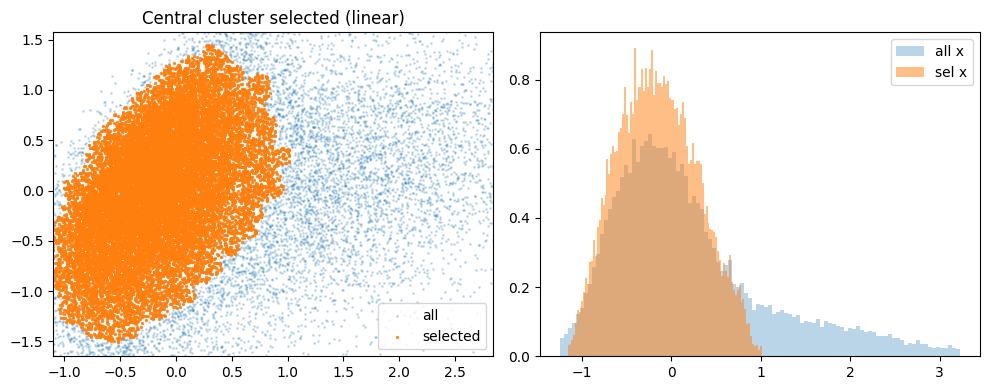

Visualization done in 1.06 seconds
Total time: 1.26 seconds


In [80]:
import time

x = df["FITC-A"].values
y = df["FSC-H"].values

start_total = time.time()
print("=== Start DBSCAN filtering ===")
start_dbscan = time.time()
mask, XYs, x_trim, y_trim, labels = filter_by_dbscan(
    x, y,
    eps=0.085,        # чувствительность к плотности
    min_samples=50,  # минимальный размер кластера
    log=True,        # логарифмирование осей
    lower_p=1,       # отсечение 1%-го перцентиля
    upper_p=99       # отсечение 99%-го перцентиля
)
end_dbscan = time.time()
print(f"DBSCAN filtering done in {end_dbscan - start_dbscan:.2f} seconds")

print("=== Start visualization ===")
start_viz = time.time()
visualize_filter_linear(x, y, mask, XYs=XYs, title="Central cluster selected")
end_viz = time.time()
print(f"Visualization done in {end_viz - start_viz:.2f} seconds")

end_total = time.time()
print(f"Total time: {end_total - start_total:.2f} seconds")

C:\Users\Professional\AppData\Local\Temp\ipykernel_43636\26594585.py:76: RuntimeWarning: invalid value encountered in log1p
  X_log = np.log1p(X)


=== GMM 2D популяции ===
Компонент 0 (Right): 5857 точек (16.16%)
Компонент 1 (Left): 30382 точек (83.84%)


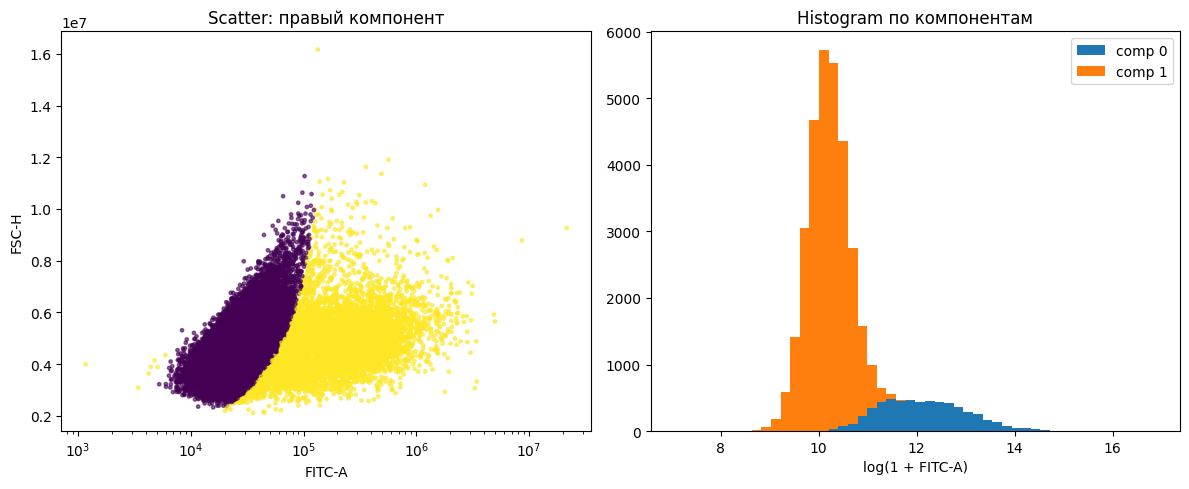

In [91]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from scipy.stats import norm

def select_right_by_gmm_1d(df, col='FITC-A', n_components=2, random_state=0, plot=True):
    df_valid = df.dropna(subset=[col]).copy()
    x = df_valid[col].values.astype(float)

    # безопасный логарифм
    x_log = np.log1p(x)

    # Fit GMM
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=random_state)
    gmm.fit(x_log.reshape(-1,1))
    labels = gmm.predict(x_log.reshape(-1,1))

    # Выбираем компонент с наибольшим средним
    means = gmm.means_.ravel()
    right_comp = np.argmax(means)
    mask_right = (labels == right_comp)

    # Статистика
    counts = np.bincount(labels)
    total = len(labels)
    print("=== GMM 1D популяции ===")
    for i, c in enumerate(counts):
        pct = 100*c/total
        tag = "Right" if i==right_comp else "Left"
        print(f"Компонент {i} ({tag}): {c} точек ({pct:.2f}%)")

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(14,5))

        # Scatter plot с джиттером по y
        y_jitter = np.random.uniform(-0.02, 0.02, size=len(x))
        axs[0].scatter(df_valid[col], df_valid['FSC-H'], c=mask_right, s=6, alpha=0.6)
        axs[0].set_xlabel(col)
        axs[0].set_xscale('log')
        axs[0].set_yscale('linear')
        axs[0].set_title('Scatter: правый компонент выделен')

        # Гистограмма + GMM на лог-шкале
        xs = np.linspace(x_log.min(), x_log.max(), 1000)
        total_pdf = np.zeros_like(xs)
        axs[1].hist(x_log, bins=100, density=True, alpha=0.4)
        for k in range(n_components):
            mu = gmm.means_[k,0]
            sigma = np.sqrt(gmm.covariances_[k].reshape(-1)[0])
            weight = gmm.weights_[k]
            pdfk = weight * norm.pdf(xs, mu, sigma)
            axs[1].plot(xs, pdfk, label=f'comp {k} (mean={mu:.2f})')
            total_pdf += pdfk
        axs[1].plot(xs, total_pdf, 'k--', label='total')
        axs[1].legend()
        axs[1].set_xlabel('log(1 + FITC-A)')
        axs[1].set_title('Histogram + GMM')

        plt.tight_layout()
        plt.show()

    # Создаем колонку в df
    df_result = df.copy()
    mask_full = np.zeros(len(df), dtype=bool)
    positions = df.index.get_indexer(df_valid.index)
    mask_full[positions] = mask_right
    df_result['label_gmm_2d'] = mask_full

    return df_result, mask_full, gmm


def select_right_by_gmm_2d(df, cols=('FITC-A','FSC-H'), n_components=2, random_state=0, plot=True):
    df_valid = df.dropna(subset=list(cols)).copy()
    X = df_valid[list(cols)].values.astype(float)
    X_log = np.log1p(X)

    # Убираем NaN и бесконечности после логарифма
    mask_valid = np.isfinite(X_log).all(axis=1)
    X_log = X_log[mask_valid]
    df_valid = df_valid.loc[mask_valid]

    if len(X_log) < n_components:
        raise ValueError(f"Недостаточно валидных точек после фильтрации: {len(X_log)} < n_components={n_components}")

    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=random_state)
    gmm.fit(X_log)
    labels = gmm.predict(X_log)

    # Компонент с наибольшим средним по FITC-A
    means = gmm.means_
    right_comp = np.argmax(means[:,0])
    mask_right = (labels == right_comp)

    # Статистика
    counts = np.bincount(labels)
    total = len(labels)
    print("=== GMM 2D популяции ===")
    for i, c in enumerate(counts):
        pct = 100*c/total
        tag = "Right" if i==right_comp else "Left"
        print(f"Компонент {i} ({tag}): {c} точек ({pct:.2f}%)")

    if plot:
        import matplotlib.pyplot as plt
        fig, axs = plt.subplots(1, 2, figsize=(12,5))
        axs[0].scatter(df_valid[cols[0]], df_valid[cols[1]], c=mask_right, s=6, alpha=0.6)
        axs[0].set_xlabel(cols[0])
        axs[0].set_ylabel(cols[1])
        axs[0].set_xscale('log')
        axs[0].set_yscale('linear')
        axs[0].set_title('Scatter: правый компонент')

        axs[1].hist([np.log1p(df_valid[cols[0]][labels==i]) for i in range(n_components)],
                    bins=50, stacked=True, label=[f'comp {i}' for i in range(n_components)])
        axs[1].set_xlabel(f'log(1 + {cols[0]})')
        axs[1].set_title('Histogram по компонентам')
        axs[1].legend()
        plt.tight_layout()
        plt.show()

    df_result = df.copy()
    mask_full = np.zeros(len(df), dtype=bool)
    positions = df.index.get_indexer(df_valid.index)
    mask_full[positions] = mask_right
    df_result['label_gmm_2d'] = mask_full

    return df_result, mask_full, gmm


# train_df = pd.read_parquet(Path("E:\\parquet\\parsed_data\\fsc-h_fsc-a\\KP.3.1.1_58-18-57-Fc_D9_bb677317-ce99-11f0-9b2d-f02f74d321c5_filtered_filtered.parquet")).dropna()
# test_df = pd.read_parquet(Path("E:\\parquet\\parsed_data\\fsc-h_fsc-a\\KP.2_KiH-7-57_8_1584903b-ce9a-11f0-b757-f02f74d321c5_filtered_filtered.parquet")).dropna()
# Примеры использования

# df1, mask_right, gmm1 = select_right_by_gmm_1d(df.dropna(), col='FITC-A', n_components=2, plot=True)
df2, mask_2d, gmm2 = select_right_by_gmm_2d(df.dropna(), cols=('FITC-A','FSC-H'), n_components=2, plot=True)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from scipy.stats import norm
import joblib
from pathlib import Path


class FlowGMMSelector1D:
    """
    Класс для работы с одномерными данными через GMM.
    Фильтрует NaN и Inf, поддерживает безопасное логарифмирование,
    возвращает DataFrame с меткой выбранного компонента.
    """
    def __init__(self, n_components=2, log=True, eps_shift=1e-9):
        self.n_components = n_components
        self.log = log
        self.eps_shift = eps_shift
        self.gmm = None
        self.right_comp = None
        self.meta = None
        self._fitted = False

    def save(self, path):
        """Сохранить объект класса целиком (joblib)."""
        path = Path(path)
        path.parent.mkdir(parents=True, exist_ok=True)
        joblib.dump(self, path)
        return path

    @classmethod
    def load(cls, path):
        """Загрузить объект (joblib)."""
        return joblib.load(path)

    def _safe_log1p(self, arr):
        arr_safe = arr + self.eps_shift
        arr_safe[arr_safe <= 0] = np.nan
        return np.log1p(arr_safe)

    def fit(self, x):
        x = np.asarray(x, dtype=float)
        x_valid = x[np.isfinite(x)]
        if x_valid.size == 0:
            raise ValueError("Нет валидных значений для обучения GMM.")
        x_proc = self._safe_log1p(x_valid) if self.log else x_valid
        x_proc = x_proc[np.isfinite(x_proc)].reshape(-1, 1)
        self.gmm = GaussianMixture(n_components=self.n_components, random_state=0)
        self.gmm.fit(x_proc)
        # выбираем «правый» компонент как тот с большим средним
        self.right_comp = np.argmax(self.gmm.means_.ravel())
        self._fitted = True
        self.meta = {"log": self.log, "eps_shift": self.eps_shift}
        return self

    def predict(self, x_new):
        if not self._fitted:
            raise RuntimeError("GMM не обучен. Вызовите fit(x).")
        x_new = np.asarray(x_new, dtype=float)
        labels_full = np.full(len(x_new), -1, dtype=int)

        # маска валидных (не NaN и не Inf) значений
        mask_valid = np.isfinite(x_new)
        if mask_valid.any():
            x_valid = x_new[mask_valid]
            x_proc = self._safe_log1p(x_valid) if self.log else x_valid
            # оставляем только конечные значения после log
            mask_final = np.isfinite(x_proc)
            if mask_final.any():
                x_for_pred = x_proc[mask_final].reshape(-1,1)
                labels_pred = self.gmm.predict(x_for_pred)
                mask_right = (labels_pred == self.right_comp).astype(int)
                # присваиваем обратно только корректные индексы
                valid_idx = np.nonzero(mask_valid)[0][mask_final]
                labels_full[valid_idx] = mask_right
        return labels_full


    def predict_df(self, df, col='FITC-A', label_col='gmm_right', inplace=False):
        if not self._fitted:
            raise RuntimeError("GMM не обучен. Вызовите fit(x).")
        df_out = df if inplace else df.copy()
        labels = self.predict(df_out[col].to_numpy())
        df_out[label_col] = labels
        return df_out

    def get_selected_df(self, df, col='FITC-A', label_col='gmm_right'):
        df_labeled = self.predict_df(df, col=col, label_col=label_col)
        return df_labeled[df_labeled[label_col] == 1].copy()

    def apply_files(self, file_paths, col='FITC-A', out_dir=None):
        """
        Аналогично FlowDBSCANSelector.process_and_visualize_files:
        фильтрует NaN, Inf, добавляет метку компонента GMM, сохраняет по файлам (если out_dir указан).
        """
        import matplotlib.pyplot as plt
        from pathlib import Path
        import os

        out_dir = Path(out_dir) if out_dir is not None else None
        rows = []
        for fp in file_paths:
            fp = Path(fp)
            if fp.suffix.lower() in ['.csv', '.txt']:
                df = pd.read_csv(fp)
            elif fp.suffix.lower() in ['.parquet', '.pq']:
                df = pd.read_parquet(fp)
            else:
                continue

            df_labeled = self.predict_df(df, col=col, label_col='gmm_right')
            mask_selected = df_labeled['gmm_right'] == 1
            total = len(df_labeled)
            selected = mask_selected.sum()
            frac = selected / total if total > 0 else 0

            stats_all = {"mean": float(np.nanmean(df_labeled[col])), "med": float(np.nanmedian(df_labeled[col]))}
            stats_sel = {"mean": float(np.nanmean(df_labeled.loc[mask_selected, col])),
                        "med": float(np.nanmedian(df_labeled.loc[mask_selected, col]))}

            rows.append({
                "file": str(fp), "rows": total, "selected": selected, "fraction": frac,
                "mean_all": stats_all["mean"], "med_all": stats_all["med"],
                "mean_sel": stats_sel["mean"], "med_sel": stats_sel["med"]
            })

            if out_dir is not None:
                out_dir.mkdir(parents=True, exist_ok=True)
                out_path = out_dir / f"{fp.stem}_gmm.parquet"
                df_labeled.to_parquet(out_path, index=False)

        summary = pd.DataFrame(rows)
        if out_dir is not None:
            summary.to_csv(out_dir / "summary_gmm.csv", index=False)
        return summary
    
    def process_and_visualize_files(self, in_dir,
                                    x_col="FITC-A", y_col="FSC-H",
                                    out_dir="gmm_results",
                                    sample_frac_for_plot=0.05,
                                    sample_cap=200_000,
                                    biexp=False,
                                    min_rows=0,
                                    model_paths=None,
                                    threshold_pct=35.0,
                                    visualize=True,
                                    recursive=False,
                                    extensions=(".parquet", ".pq", ".csv", ".txt")):
        """
        Обрабатывает все файлы в директории `in_dir`:
        - ищет файлы с расширениями `extensions` (рекурсивно если recursive=True)
        - для каждого файла: пытаетcя применить модели из model_paths (или self)
        - выбирает первую модель, у которой infectivity_percent < threshold_pct
        - сохраняет labeled parquet и (опционально) png-рисунок в out_dir
        - выводит прогресс [i/N] Processing: <filename>
        - возвращает DataFrame summary

        Параметры:
        in_dir: str or Path — директория с файлами
        visualize: bool — сохранять ли PNG (True) или нет (False)
        recursive: bool — использовать рекурсивный поиск (rglob) или нет (glob)
        extensions: tuple — допустимые расширения файлов (по умолчанию parquet/csv/txt)
        """
        from pathlib import Path
        import pandas as pd
        import numpy as np
        import math

        in_dir = Path(in_dir)
        if not in_dir.exists() or not in_dir.is_dir():
            raise ValueError(f"in_dir не найдена или не директория: {in_dir}")

        out_dir = Path(out_dir)
        out_dir.mkdir(parents=True, exist_ok=True)

        # Собираем список файлов
        file_paths = []
        if recursive:
            iterator = in_dir.rglob("*")
        else:
            iterator = in_dir.glob("*")

        exts_lower = tuple(e.lower() for e in extensions)
        for p in iterator:
            if not p.is_file():
                continue
            if p.suffix.lower() in exts_lower:
                file_paths.append(p)

        file_paths = sorted(file_paths)
        total_files = len(file_paths)
        if total_files == 0:
            print(f"No files with extensions {extensions} found in {in_dir}")
            return pd.DataFrame([])

        # Загружаем модели (как в process_files_list)
        models, model_sources = self._load_models_list(model_paths)

        rows = []
        rng = np.random.RandomState(0)

        for idx_file, fp in enumerate(file_paths, start=1):
            print(f"[{idx_file}/{total_files}] Processing: {fp.name}")

            # чтение
            try:
                if fp.suffix.lower() in [".parquet", ".pq"]:
                    df = pd.read_parquet(fp)
                elif fp.suffix.lower() in [".csv", ".txt"]:
                    df = pd.read_csv(fp)
                else:
                    # на всякий случай (хотя отфильтровано выше)
                    print("  Unsupported file:", fp)
                    rows.append({"file": str(fp), "rows": None, "selected": None,
                                "infectivity_percent": None,
                                "model_used": "unsupported", "model_path": None})
                    continue
            except Exception as e:
                print("  Read failed:", fp, e)
                rows.append({"file": str(fp), "rows": None, "selected": None,
                            "infectivity_percent": None,
                            "model_used": "read_failed", "model_path": None})
                continue

            total = len(df)
            if total < min_rows:
                print(f"  Skipped {fp.name}: rows {total} < {min_rows}")
                rows.append({"file": str(fp), "rows": total, "selected": 0,
                            "infectivity_percent": None,
                            "model_used": "skipped_min_rows", "model_path": None})
                continue

            accepted = False
            df_labeled_to_save = None
            used_model_idx = None
            used_model_src = None
            stats_for_save = None

            # пробуем модели по порядку
            for m_idx, model in enumerate(models):
                try:
                    df_labeled = model.predict_df(df, col=x_col, label_col="gmm_right")
                except Exception as e:
                    print(f"   Model {m_idx} predict failed: {e}")
                    continue

                selected = int((df_labeled["gmm_right"] == 1).sum())
                infectivity_percent = 100 * selected / total if total > 0 else 0.0

                print(f"    Model {m_idx}: infectivity_percent = {infectivity_percent:.2f}%")

                if infectivity_percent < threshold_pct:
                    accepted = True
                    used_model_idx = m_idx
                    used_model_src = model_sources[m_idx] if m_idx < len(model_sources) else None
                    df_labeled_to_save = df_labeled

                    # компонентная статистика (если возможно)
                    x_valid = df_labeled[x_col].to_numpy()
                    x_valid = x_valid[np.isfinite(x_valid) & (x_valid > 0)]
                    if x_valid.size > 0 and hasattr(model, "gmm") and model.gmm is not None:
                        comp = model.gmm.predict(np.log1p(x_valid).reshape(-1, 1))
                        uniq, cnt = np.unique(comp, return_counts=True)
                    else:
                        uniq, cnt = np.array([], dtype=int), np.array([], dtype=int)

                    stats = {
                        "file": str(fp),
                        "rows": total,
                        "selected": int(selected),
                        "infectivity_percent": float(infectivity_percent),
                        "model_used": int(m_idx),
                        "model_path": used_model_src
                    }
                    for u, c in zip(uniq, cnt):
                        stats[f"comp_{u}_count"] = int(c)
                        stats[f"comp_{u}_pct"] = float(c / len(comp) * 100.0) if len(comp) > 0 else 0.0

                    stats_for_save = stats
                    break
                else:
                    # пробуем следующую модель
                    continue

            if not accepted:
                print(f"  No model produced infectivity_percent < {threshold_pct}%, skipping file.")
                rows.append({"file": str(fp), "rows": total, "selected": 0,
                            "infectivity_percent": None,
                            "model_used": "skipped", "model_path": None})
                continue

            # сохраняем labeled parquet
            out_parquet = out_dir / f"{fp.stem}_gmm.parquet"
            try:
                df_labeled_to_save.to_parquet(out_parquet, index=False)
            except Exception as e:
                print("  Failed to save parquet:", e)

            # визуализация (опционально)
            if visualize:
                out_png = out_dir / f"{fp.stem}_gmm.png"
                try:
                    # используем gmm выбранной модели (если есть)
                    gmm_to_plot = None
                    if used_model_idx is not None and used_model_idx < len(models):
                        mod = models[used_model_idx]
                        if hasattr(mod, "gmm"):
                            gmm_to_plot = mod.gmm
                    # Если gmm отсутствует, пытаемся взять self.gmm как fallback
                    if gmm_to_plot is None:
                        gmm_to_plot = getattr(self, "gmm", None)

                    if gmm_to_plot is None:
                        print("  No gmm available for plotting, skipping plot.")
                    else:
                        # семплирование для уменьшения размера картинки
                        if sample_frac_for_plot is not None and 0 < sample_frac_for_plot < 1.0:
                            sample_n = min(int(total * sample_frac_for_plot), sample_cap)
                            if sample_n < total:
                                idx_plot = rng.choice(total, size=sample_n, replace=False)
                                df_plot = df_labeled_to_save.iloc[idx_plot]
                            else:
                                df_plot = df_labeled_to_save
                        else:
                            df_plot = df_labeled_to_save

                        # используем метод plot_gmm_full_figure класса (он сохранит картинку)
                        try:
                            self.plot_gmm_full_figure(df_plot, gmm=gmm_to_plot,
                                                    col_x=x_col, col_y=y_col,
                                                    title=f"{fp.name} (model {used_model_idx})",
                                                    biexp=biexp, out_path=out_png)
                        except Exception as e:
                            print("  Plot failed for", fp.name, e)
                except Exception as e:
                    print("  Visualization step failed:", e)

            # добавляем в summary
            rows.append(stats_for_save)

        # общий summary
        summary = pd.DataFrame(rows)
        summary_path = Path(out_dir) / "summary_gmm.csv"
        try:
            summary.to_csv(summary_path, index=False)
            print("Summary saved to", summary_path)
        except Exception as e:
            print("Failed to save summary:", e)

        return summary
    
    def _load_models_list(self, model_paths):
        """
        Принимает None или список путей/объектов и возвращает (models, model_sources).
        Если model_paths is None -> возвращает [self], [None]
        """
        from pathlib import Path
        import joblib

        if model_paths is None:
            return [self], [None]

        models = []
        sources = []
        for p in model_paths:
            # если уже объект модели
            if hasattr(p, "predict_df") and hasattr(p, "gmm"):
                models.append(p)
                sources.append(None)
                continue
            # иначе считаем, что это путь
            try:
                obj = joblib.load(str(p))
                models.append(obj)
                sources.append(str(p))
            except Exception as e:
                print(f"Warning: can't load model {p}: {e}")
        if not models:
            return [self], [None]
        return models, sources


    def plot_gmm_full_figure(self, df, gmm=None, col_x='FITC-A', col_y='FSC-H',
                             title="GMM Full Plot", biexp=False, out_path=None):
        """
        Интегрированная версия plot_gmm_full_figure как метод класса.
        Гарантирует, что цвета компонент одинаковы в обоих сабплотах и подписи
        'infected cells'/'not infected cells' соответствуют right_comp.
        Если gmm is None — используется self.gmm.
        """
        import numpy as np
        import matplotlib.pyplot as plt
        from pathlib import Path

        if gmm is None:
            if not hasattr(self, "gmm") or self.gmm is None:
                raise RuntimeError("No gmm available for plotting.")
            gmm = self.gmm

        x_raw = df[col_x].to_numpy()
        y_raw = df[col_y].to_numpy()
        labels_raw = df.get("gmm_right", np.full(len(df), -1)).to_numpy()

        mask_valid = np.isfinite(x_raw) & np.isfinite(y_raw) & (x_raw > 0)
        x = x_raw[mask_valid]
        y = y_raw[mask_valid]
        labels = labels_raw[mask_valid].astype(int)

        if x.size == 0:
            raise ValueError("Нет валидных значений для построения.")

        # подготовка для модели (log1p)
        x_pred = np.log1p(x).reshape(-1, 1)

        # сетка в x-space (линейная)
        xs = np.linspace(x.min(), x.max(), 800)
        zs = np.log1p(xs).reshape(-1, 1)   # z = log1p(x)

        # параметры gmm
        n_comp = gmm.n_components
        weights = gmm.weights_.ravel()
        means = gmm.means_.ravel()

        # извлечь дисперсии 1D
        covs = gmm.covariances_
        if covs.ndim == 1:
            vars_ = covs
        elif covs.ndim == 2 and covs.shape[1] == 1:
            vars_ = covs[:, 0]
        else:
            vars_ = covs.reshape(n_comp, -1)[:, 0]
        sigmas = np.sqrt(vars_)

        # pdf в z-space для каждого компонента
        pdfs_z = np.zeros((zs.shape[0], n_comp))
        for k in range(n_comp):
            pdfs_z[:, k] = weights[k] * norm.pdf(zs.ravel(), loc=means[k], scale=sigmas[k])

        # перевод в x-space
        jac = 1.0 / (1.0 + xs)
        pdfs_x = pdfs_z * jac[:, None]
        pdf_mix_x = pdfs_x.sum(axis=1)

        # цвета — одинаковые для всех мест
        colors = plt.cm.tab10(np.arange(n_comp))

        # подписи: если есть self.right_comp, считаем её infected
        if hasattr(self, "right_comp") and self.right_comp is not None and n_comp >= 2:
            right_idx = int(self.right_comp)
            label_names = {}
            for k in range(n_comp):
                if k == right_idx:
                    label_names[k] = "infected cells"
                else:
                    # для 2-компонентов — пометим остальные как not infected
                    label_names[k] = "not infected cells" if n_comp == 2 else f"Comp {k}"
        else:
            # fallback
            label_names = {k: f"Comp {k}" for k in range(n_comp)}

        # рисуем
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))

        # Левый: гистограмма + mixture + компоненты
        ax = axes[0]
        ax.hist(x, bins=200, density=True, alpha=0.35, color="gray", label="Data (hist)")
        for k in range(n_comp):
            ax.plot(xs, pdfs_x[:, k], linestyle='--', linewidth=1.8, color=colors[k],
                    label=f"{label_names.get(k, 'Comp '+str(k))} (w={weights[k]:.2f})")
        ax.plot(xs, pdf_mix_x, linewidth=2.2, color="black", label="Mixture")
        ax.set_xlabel(col_x)
        ax.set_xscale("log")
        ax.set_ylabel("Density")
        ax.set_title("Histogram + GMM (x-space)")
        ax.legend(fontsize=9)
        ax.grid(alpha=0.3)

        # Правый: scatter по компонентам — используем те же цвета
        ax2 = axes[1]
        if biexp:
            def biexp_transform(v, w=0.5, a=4.5):
                return np.sign(v) * (np.log(1 + w * np.abs(v)) / a)
            x_plot = biexp_transform(x)
            x_label = f"{col_x} (biexp)"
        else:
            x_plot = np.log10(x)
            x_label = f"{col_x} (log10)"

        # метки компонент для точек (используем предсказание gmm на x_pred)
        comp_labels = gmm.predict(np.log1p(x).reshape(-1, 1))
        # цвета точек по component labels, те же colors
        point_colors = colors[comp_labels]

        sc = ax2.scatter(x_plot, y, c=point_colors, s=6, alpha=0.6)
        ax2.set_xlabel(x_label)
        ax2.set_ylabel(col_y)
        ax2.set_title("Scatter colored by GMM component")
        ax2.grid(alpha=0.2)

        # легенда для правого графика: создаём ручки вручную, чтобы подписи совпадали
        from matplotlib.patches import Patch
        legend_patches = []
        used_indices = np.unique(comp_labels)
        for k in used_indices:
            name = label_names.get(int(k), f"Comp {k}")
            legend_patches.append(Patch(color=colors[int(k)], label=f"{name} (comp {int(k)})"))
        ax2.legend(handles=legend_patches, fontsize=9)

        fig.suptitle(title, fontsize=14)
        plt.tight_layout()

        if out_path is not None:
            Path(out_path).parent.mkdir(parents=True, exist_ok=True)
            fig.savefig(out_path, dpi=180, bbox_inches="tight")
            plt.close(fig)
        else:
            plt.show()

        # возвращаем stats
        comp_labels_all = gmm.predict(np.log1p(x).reshape(-1, 1))
        total = len(comp_labels_all)
        counts = np.bincount(comp_labels_all, minlength=n_comp)
        stats = [{"comp": i, "count": int(counts[i]), "pct": float(counts[i]/total*100.0)} for i in range(n_comp)]
        return stats


    def process_files_list(self, file_paths, out_dir="gmm_results_list", x_col="FITC-A", y_col="FSC-H",
                           sample_frac_for_plot=0.05, sample_cap=200_000, biexp=False,
                           min_rows=0, model_paths=None, threshold_pct=35.0, summary_plot_name="summary_plot.png"):
        """
        Обработка списка файлов по тому же принципу выбора модели:
          - model_paths: список путей/объектов (если None, используется self)
          - для каждого файла начинаем с первой модели, если infectivity_percent >= threshold_pct
            переключаемся на следующую; принимаем первую модель с infectivity_percent < threshold_pct.
          - сохраняем labeled parquet/labels (в out_dir), строим summary csv и один общий рисунок.
        Возвращает pd.DataFrame summary.
        """
        from pathlib import Path
        import pandas as pd
        import numpy as np
        import matplotlib.pyplot as plt

        out_dir = Path(out_dir)
        out_dir.mkdir(parents=True, exist_ok=True)

        # нормализуем file_paths в список Path
        fpaths = [Path(p) for p in file_paths]

        # загрузим модели
        models, model_sources = self._load_models_list(model_paths)

        rows = []
        for fp in fpaths:
            print("Processing:", fp)
            try:
                if fp.suffix.lower() in [".parquet", ".pq"]:
                    df = pd.read_parquet(fp)
                elif fp.suffix.lower() in [".csv", ".txt"]:
                    df = pd.read_csv(fp)
                else:
                    print("  Unsupported file:", fp)
                    rows.append({"file": str(fp), "rows": None, "selected": None, "infectivity_percent": None,
                                 "model_used": "unsupported", "model_path": None})
                    continue
            except Exception as e:
                print("  Read failed:", fp, e)
                rows.append({"file": str(fp), "rows": None, "selected": None, "infectivity_percent": None,
                             "model_used": "read_failed", "model_path": None})
                continue

            total = len(df)
            if total < min_rows:
                print(f"  Skipped {fp.name}: rows {total} < {min_rows}")
                rows.append({"file": str(fp), "rows": total, "selected": 0, "infectivity_percent": None,
                             "model_used": "skipped_min_rows", "model_path": None})
                continue

            accepted = False
            df_labeled_to_save = None
            used_model_idx = None
            used_model_src = None
            stats_for_save = None

            for m_idx, model in enumerate(models):
                try:
                    df_labeled = model.predict_df(df, col=x_col, label_col="gmm_right")
                except Exception as e:
                    print(f"  Model {m_idx} predict failed for {fp.name}: {e}")
                    continue

                selected = int((df_labeled["gmm_right"] == 1).sum())
                infectivity_percent = 100 * selected / total if total > 0 else 0.0

                print(f"   Model {m_idx}: infectivity_percent = {infectivity_percent:.2f}%")

                if infectivity_percent < threshold_pct:
                    accepted = True
                    used_model_idx = m_idx
                    used_model_src = model_sources[m_idx] if m_idx < len(model_sources) else None
                    df_labeled_to_save = df_labeled
                    # component stats if possible
                    x_valid = df_labeled[x_col].to_numpy()
                    x_valid = x_valid[np.isfinite(x_valid) & (x_valid > 0)]
                    if x_valid.size > 0 and hasattr(model, "gmm") and model.gmm is not None:
                        comp = model.gmm.predict(np.log1p(x_valid).reshape(-1, 1))
                        uniq, cnt = np.unique(comp, return_counts=True)
                    else:
                        uniq, cnt = np.array([], dtype=int), np.array([], dtype=int)
                    stats = {
                        "file": str(fp),
                        "rows": total,
                        "selected": int(selected),
                        "infectivity_percent": float(infectivity_percent),
                        "model_used": int(m_idx),
                        "model_path": used_model_src
                    }
                    for u, c in zip(uniq, cnt):
                        stats[f"comp_{u}_count"] = int(c)
                        stats[f"comp_{u}_pct"] = float(c / len(comp) * 100.0) if len(comp)>0 else 0.0
                    stats_for_save = stats
                    break
                else:
                    continue

            if not accepted:
                print(f"  No model produced infectivity_percent < {threshold_pct}%, skipping file.")
                rows.append({"file": str(fp), "rows": total, "selected": 0, "infectivity_percent": None,
                             "model_used": "skipped", "model_path": None})
                continue

            # сохраняем labeled parquet
            out_parquet = out_dir / f"{fp.stem}_gmm.parquet"
            try:
                df_labeled_to_save.to_parquet(out_parquet, index=False)
            except Exception as e:
                print("  Failed to save parquet:", e)

            # сохраняем локальный рисунок для файла (опционально)
            out_png = out_dir / f"{fp.stem}_gmm.png"
            try:
                self.plot_gmm_full_figure(df_labeled_to_save, gmm=models[used_model_idx].gmm,
                                          col_x=x_col, col_y=y_col,
                                          title=f"{fp.name} (model {used_model_idx})",
                                          biexp=biexp, out_path=out_png)
            except Exception as e:
                print("  Plot failed for", fp.name, e)

            rows.append(stats_for_save)

        # общий summary
        summary = pd.DataFrame(rows)
        summary.to_csv(out_dir / "summary_from_list.csv", index=False)
        print("Summary saved to", out_dir / "summary_from_list.csv")

        # --- строим итоговый рисунок: bar plot infectivity_percent по файлам ---
        try:
            fig, ax = plt.subplots(figsize=(12, 6))
            # для упрощения — берем только те строки, у которых infectivity_percent не None
            plot_df = summary.copy()
            plot_df['display_name'] = plot_df['file'].apply(lambda p: Path(p).stem if p is not None else str(p))
            # цвета: каждый модельный индекс -> цвет
            unique_models = plot_df['model_used'].fillna('skipped').unique()
            # подготовим палитру
            palette = {}
            cmap = plt.cm.tab10
            model_idxs = [m for m in unique_models if isinstance(m, (int, np.integer))]
            for idx, m in enumerate(sorted(model_idxs)):
                palette[m] = cmap(idx % 10)
            palette['skipped'] = (0.7, 0.7, 0.7)  # grey for skipped/none

            xs = np.arange(len(plot_df))
            heights = plot_df['infectivity_percent'].fillna(0.0).to_numpy()
            colors_bar = [palette.get(v, palette['skipped']) for v in plot_df['model_used'].fillna('skipped')]

            ax.bar(xs, heights, color=colors_bar)
            ax.set_xticks(xs)
            ax.set_xticklabels(plot_df['display_name'], rotation=45, ha='right', fontsize=8)
            ax.set_ylabel("Infectivity percent")
            ax.set_title("Infectivity percent per file (model used indicated by color)")

            # легенда ручками
            from matplotlib.patches import Patch
            legend_handles = []
            for m, col in palette.items():
                name = f"model {m}" if m != 'skipped' else "skipped"
                legend_handles.append(Patch(color=col, label=name))
            ax.legend(handles=legend_handles, bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)

            plt.tight_layout()
            summary_plot_path = out_dir / summary_plot_name
            fig.savefig(summary_plot_path, dpi=150, bbox_inches='tight')
            plt.close(fig)
            print("Summary plot saved to", summary_plot_path)
        except Exception as e:
            print("Failed to create summary plot:", e)

        return summary




def plot_gmm_1d_prediction_with_stats(gmm, x, title="GMM 1D Prediction"):
    import numpy as np
    import matplotlib.pyplot as plt

    # --- 1. Очистка данных от NaN и отрицательных ---
    x = np.asarray(x).flatten()
    mask_valid = np.isfinite(x) & (x > 0)
    x_clean = x[mask_valid]

    if len(x_clean) == 0:
        raise ValueError("Нет корректных значений для построения графика (все NaN или <=0).")

    # лог-трансформация как при обучении
    x_log = np.log1p(x_clean).reshape(-1, 1)

    # предсказания
    labels = gmm.predict(x_log)

    # --- 2. Сетка ---
    xs = np.linspace(x_clean.min(), x_clean.max(), 1000)
    xs_log = np.log1p(xs).reshape(-1, 1)

    logprob = gmm.score_samples(xs_log)
    responsibilities = gmm.predict_proba(xs_log)
    pdf = np.exp(logprob)
    pdf0 = responsibilities[:, 0] * pdf
    pdf1 = responsibilities[:, 1] * pdf

    # --- 3. График ---
    plt.figure(figsize=(10, 6))

    # гистограмма
    plt.hist(x_clean, bins=200, density=True, alpha=0.4, color='gray', label="Data")

    # компоненты GMM
    plt.plot(xs, pdf0, linewidth=2, label="Component 0")
    plt.plot(xs, pdf1, linewidth=2, label="Component 1")
    plt.plot(xs, pdf, linewidth=2, label="Mixture", color="black")

    plt.xlabel("FITC-A")
    plt.ylabel("Density")
    plt.title(title)
    plt.legend()
    plt.grid(True)

    # --- 4. Статистика ---
    print("=== COMPONENT STATISTICS ===")
    for i in range(gmm.means_.shape[0]):
        print(f"Component {i}: mean(log)={gmm.means_[i][0]:.3f}, weight={gmm.weights_[i]:.3f}")

    print("\n=== PREDICTION COUNTS ===")
    uniq, cnt = np.unique(labels, return_counts=True)
    for u, c in zip(uniq, cnt):
        print(f"Label {u}: {c}")

    plt.show()

def plot_gmm_full_figure(df, gmm, col_x='FITC-A', col_y='FSC-H',
                         title="GMM Full Plot", biexp=False, out_path=None):
    """
    Корректно рисует:
      - гистограмму FITC-A (линейная ось)
      - PDF mixture и PDF каждой компоненты, корректно преобразованные из log1p-space в x-space
      - scatter FSC-H vs FITC-A (лог по X или biexp)
    Если out_path задан — сохраняет фигуру туда.
    """
    x_raw = df[col_x].to_numpy()
    y_raw = df[col_y].to_numpy()
    labels_raw = df.get("gmm_right", np.full(len(df), -1)).to_numpy()

    mask_valid = np.isfinite(x_raw) & np.isfinite(y_raw) & (x_raw > 0)
    x = x_raw[mask_valid]
    y = y_raw[mask_valid]
    labels = labels_raw[mask_valid].astype(int)

    if x.size == 0:
        raise ValueError("Нет валидных значений для построения.")

    # x_pred для модели: лог так же как при обучении (log1p)
    x_pred = np.log1p(x).reshape(-1, 1)

    # сетка в x-space (линейная)
    xs = np.linspace(x.min(), x.max(), 800)
    zs = np.log1p(xs).reshape(-1, 1)   # z = log1p(x)

    # --- Получаем pdf в z-space для каждого компонента ---
    # извлекаем параметры (варианс учитываем общий формат covariances_)
    n_comp = gmm.n_components
    weights = gmm.weights_.ravel()
    means = gmm.means_.ravel()

    # извлечь дисперсии 1D
    covs = gmm.covariances_
    if covs.ndim == 1:
        vars_ = covs
    elif covs.ndim == 2 and covs.shape[1] == 1:
        vars_ = covs[:, 0]
    else:
        # возможно форма (n_comp, 1, 1)
        vars_ = covs.reshape(n_comp, -1)[:, 0]

    sigmas = np.sqrt(vars_)

    # pdf_z_k(z) = weight_k * N(z | mu_k, sigma_k)
    pdfs_z = np.zeros((zs.shape[0], n_comp))
    for k in range(n_comp):
        pdfs_z[:, k] = weights[k] * norm.pdf(zs.ravel(), loc=means[k], scale=sigmas[k])

    # переводим в x-space: pdf_x(x) = pdf_z(z) * dz/dx = pdf_z(z) * 1/(1+x)
    jac = 1.0 / (1.0 + xs)  # dz/dx evaluated on xs
    pdfs_x = pdfs_z * jac[:, None]   # shape (len(xs), n_comp)
    pdf_mix_x = pdfs_x.sum(axis=1)

    # --- Рисуем сабплоты ---
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # левый: гистограмма + mixture + components (в x-space)
    ax = axes[0]
    ax.hist(x, bins=200, density=True, alpha=0.35, color="gray", label="Data (hist)")

    # компонентные кривые
    colors = plt.cm.tab10(np.arange(n_comp))
    for k in range(n_comp):
        ax.plot(xs, pdfs_x[:, k], linestyle='--', linewidth=1.8, color=colors[k],
                label=f"Comp {k} (w={weights[k]:.2f})")

    # смесь
    ax.plot(xs, pdf_mix_x, linewidth=2.2, color="black", label="Mixture")

    ax.set_xlabel(col_x)
    ax.set_xscale("log")
    ax.set_ylabel("Density")
    ax.set_title("Histogram + GMM (x-space)")
    ax.legend(fontsize=9)
    ax.grid(alpha=0.3)

    # правый: scatter FSC-H vs FITC-A with color by component (use same comp labels from model)
    ax2 = axes[1]
    # for plotting we can use log10 or biexp transform for readability
    if biexp:
        def biexp_transform(v, w=0.5, a=4.5):
            return np.sign(v) * (np.log(1 + w * np.abs(v)) / a)
        x_plot = biexp_transform(x)
    else:
        x_plot = np.log10(x)

    sc = ax2.scatter(x_plot, y, c=gmm.predict(x_pred), cmap="coolwarm", s=6, alpha=0.5)
    ax2.set_xlabel(f"{col_x} ({'biexp' if biexp else 'log10'})")
    ax2.set_ylabel(col_y)
    ax2.set_title("Scatter colored by GMM component")
    ax2.grid(alpha=0.2)
    plt.colorbar(sc, ax=ax2, label="component")

    fig.suptitle(title, fontsize=14)
    plt.tight_layout()

    if out_path is not None:
        Path(out_path).parent.mkdir(parents=True, exist_ok=True)
        fig.savefig(out_path, dpi=180, bbox_inches="tight")
        plt.close(fig)
    else:
        plt.show()

    # возвращаем stats
    comp_labels = gmm.predict(np.log1p(x).reshape(-1, 1))
    total = len(comp_labels)
    counts = np.bincount(comp_labels, minlength=n_comp)
    stats = [{"comp": i, "count": int(counts[i]), "pct": float(counts[i]/total*100.0)} for i in range(n_comp)]
    return stats



from pathlib import Path

train_df = pd.read_parquet(Path("E:/parquet/parsed_data/fsc-h_fsc-a/XFG_57-18-H18K(sa55)_B11_2441332a-ce9a-11f0-8046-f02f74d321c5_1_2.parquet")).dropna()
test_df = pd.read_parquet(Path("E:/parquet/parsed_data/fsc-h_fsc-a/NB.1.8.1_58-Fc_C11_e1de580f-ce99-11f0-841c-f02f74d321c5_1_2.parquet")).dropna()

gmm_selector = FlowGMMSelector1D(n_components=2, log=True)

gmm_selector.fit(train_df['FITC-A'].to_numpy())

df_test_labeled = gmm_selector.predict_df(test_df, col='FITC-A', label_col='gmm_right')
mask_test = df_test_labeled['gmm_right'] == 1

# Подготовка данных для визуализации
# x_plot = df_test_labeled['FITC-A'].to_numpy()
# mask_valid = np.isfinite(x_plot)
# x_plot_valid = x_plot[mask_valid]

# Метки для правого компонента
# mask_right_valid = df_test_labeled['gmm_right'].to_numpy()[mask_valid] == 1

# plot_gmm_1d_prediction_with_stats(
#     gmm=gmm_selector.gmm,
#     x=test_df['FITC-A'].to_numpy(),
#     title="GMM prediction on test FITC-A"
# )

plot_gmm_full_figure(
    df_test_labeled,
    gmm=gmm_selector.gmm,
    col_x='FITC-A',
    col_y='FSC-H',
    title="GMM | FITC-A & FSC-H",
    biexp=False      # поставь True если хочешь биэкспоненциальную шкалу
)

# model_path = gmm_selector.save("models/fitc-a_fsc-h_gmm_selector_1.joblib")

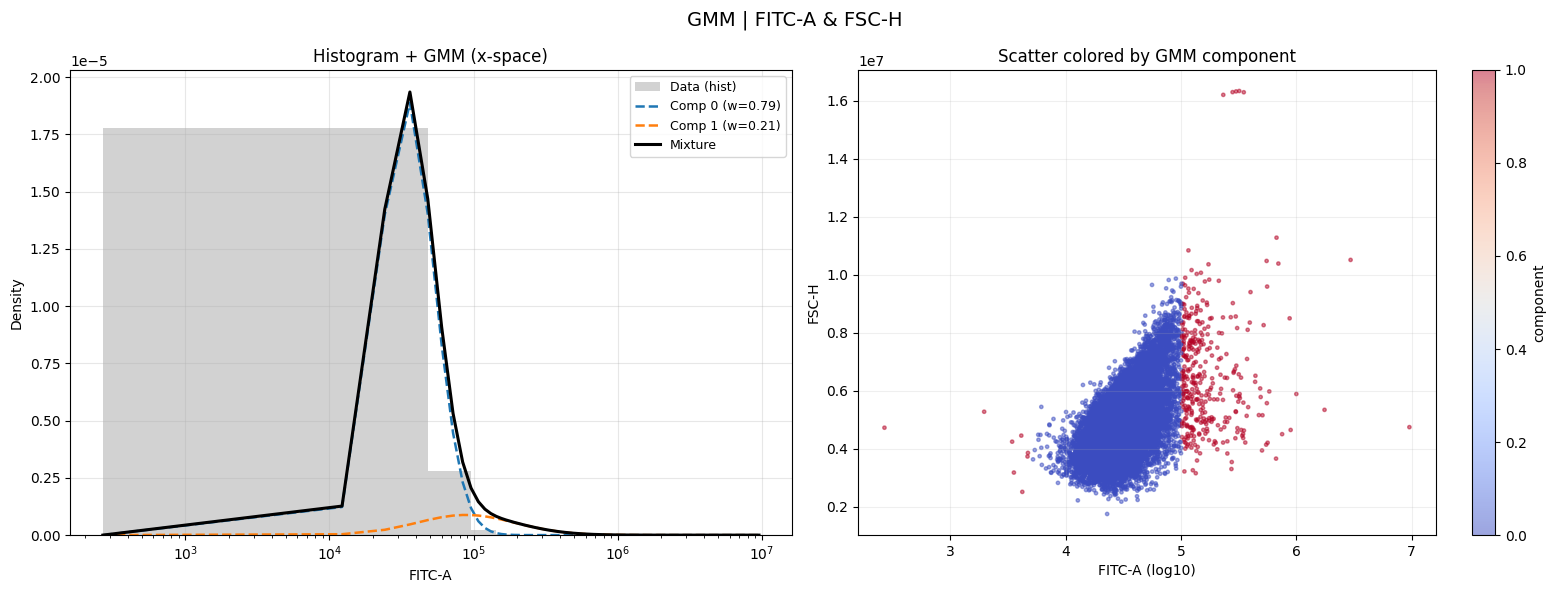

In [110]:
train_df = pd.read_parquet(Path("E:\\parquet\\parsed_data\\fsc-h_fsc-a\\KP.2_SA55_9_1721169c-ce9a-11f0-8a10-f02f74d321c5_filtered_filtered.parquet")).dropna()
test_df = pd.read_parquet(Path("E:\\parquet\\parsed_data\\fsc-h_fsc-a\\KP.2_KiH-7-57_1_14600bf1-ce9a-11f0-85cb-f02f74d321c5_filtered_filtered.parquet")).dropna()

gmm_selector = FlowGMMSelector1D(n_components=2, log=True)

gmm_selector.fit(train_df['FITC-A'].to_numpy())

df_test_labeled = gmm_selector.predict_df(test_df, col='FITC-A', label_col='gmm_right')
mask_test = df_test_labeled['gmm_right'] == 1

# Подготовка данных для визуализации
# x_plot = df_test_labeled['FITC-A'].to_numpy()
# mask_valid = np.isfinite(x_plot)
# x_plot_valid = x_plot[mask_valid]

# Метки для правого компонента
# mask_right_valid = df_test_labeled['gmm_right'].to_numpy()[mask_valid] == 1

# plot_gmm_1d_prediction_with_stats(
#     gmm=gmm_selector.gmm,
#     x=test_df['FITC-A'].to_numpy(),
#     title="GMM prediction on test FITC-A"
# )

plot_gmm_full_figure(
    df_test_labeled,
    gmm=gmm_selector.gmm,
    col_x='FITC-A',
    col_y='FSC-H',
    title="GMM | FITC-A & FSC-H",
    biexp=False      # поставь True если хочешь биэкспоненциальную шкалу
)

model_path = gmm_selector.save("models/fitc-a_fsc-h_gmm_selector_2.joblib")

In [140]:
# использовать 2 модели из файлов (каждый файл — joblib c экземпляром FlowGMMSelector1D)
model_paths = [
    "models/fitc-a_fsc-h_gmm_selector_1.joblib",
    "models/fitc-a_fsc-h_gmm_selector_2.joblib"
]
# обработать папку с переключением моделей
# gmm_selector.process_folder("data/in_dir", out_dir="out_gmm", model_paths=model_paths, threshold_pct=35.0)
gmm_selector = FlowGMMSelector1D()

# только метки
gmm_selector.process_and_visualize_files(
    in_dir="E:/parquet/parsed_data/fsc-h_fsc-a",
    out_dir="E:/parquet/parsed_data/fitc-a_fsc-h",
    x_col="FITC-A", 
    model_paths=model_paths, 
    threshold_pct=35.0
    )


[1/1223] Processing: EG.5_57-Fc_1_b80d42dd-ce9a-11f0-aae4-f02f74d321c5_1_2.parquet
    Model 0: infectivity_percent = 4.73%
[2/1223] Processing: EG.5_57-Fc_2_b999db9e-ce9a-11f0-b466-f02f74d321c5_1_2.parquet
    Model 0: infectivity_percent = 5.50%
[3/1223] Processing: EG.5_57-Fc_3_bb1a021a-ce9a-11f0-9e64-f02f74d321c5_1_2.parquet
    Model 0: infectivity_percent = 5.37%
[4/1223] Processing: EG.5_57-Fc_4_bc986e81-ce9a-11f0-a9d9-f02f74d321c5_1_2.parquet
    Model 0: infectivity_percent = 5.85%
[5/1223] Processing: EG.5_57-Fc_5_be122ebb-ce9a-11f0-acf3-f02f74d321c5_1_2.parquet
    Model 0: infectivity_percent = 5.42%
[6/1223] Processing: EG.5_57-Fc_6_bf908d79-ce9a-11f0-b2af-f02f74d321c5_1_2.parquet
    Model 0: infectivity_percent = 5.68%
[7/1223] Processing: EG.5_57-Fc_7_c11ea526-ce9a-11f0-bd6b-f02f74d321c5_1_2.parquet
    Model 0: infectivity_percent = 5.50%
[8/1223] Processing: EG.5_57-Fc_8_c2a56e91-ce9a-11f0-8bf3-f02f74d321c5_1_2.parquet
    Model 0: infectivity_percent = 6.48%
[9/1223]

KeyboardInterrupt: 

In [128]:
file_list = [
    "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\JN.1_7-35-57_7_a772f627-ce99-11f0-90bd-f02f74d321c5_filtered_filtered.parquet", 
    "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\KP.3.1.1_58-18-57-Fc_D9_bb677317-ce99-11f0-9b2d-f02f74d321c5_filtered_filtered.parquet", 
    "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\EG.5_58-10-57_4_08abcc31-ce9a-11f0-b2e5-f02f74d321c5_filtered_filtered.parquet",
    "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\KP.2_58-N-57_9_108af62e-ce9a-11f0-822d-f02f74d321c5_filtered_filtered.parquet",
    "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\XFG_57-18-H18K(sa55)_B4_24d3a807-ce9a-11f0-81c2-f02f74d321c5_filtered_filtered.parquet",
    "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\XFG_XFG_SA55_A10_41e5b654-ce9a-11f0-bfa6-f02f74d321c5_filtered_filtered.parquet",
    "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\NB.1.8.1_58-35-H15K_A8_df8a8c82-ce99-11f0-8b9a-f02f74d321c5_filtered_filtered.parquet",
]

model_paths = [
    "models/fitc-a_fsc-h_gmm_selector_1.joblib",
    "models/fitc-a_fsc-h_gmm_selector_2.joblib"
]
# обработать папку с переключением моделей
# gmm_selector.process_folder("data/in_dir", out_dir="out_gmm", model_paths=model_paths, threshold_pct=35.0)
gmm_selector = FlowGMMSelector1D()

# обрабатывать список
summary = gmm_selector.process_files_list(file_list, out_dir="out_from_list",
                                          model_paths=model_paths, threshold_pct=35.0)

summary

Processing: E:\parquet\parsed_data\fsc-h_fsc-a\JN.1_7-35-57_7_a772f627-ce99-11f0-90bd-f02f74d321c5_filtered_filtered.parquet
   Model 0: infectivity_percent = 6.81%
Processing: E:\parquet\parsed_data\fsc-h_fsc-a\KP.3.1.1_58-18-57-Fc_D9_bb677317-ce99-11f0-9b2d-f02f74d321c5_filtered_filtered.parquet
   Model 0: infectivity_percent = 99.76%
   Model 1: infectivity_percent = 11.88%
Processing: E:\parquet\parsed_data\fsc-h_fsc-a\EG.5_58-10-57_4_08abcc31-ce9a-11f0-b2e5-f02f74d321c5_filtered_filtered.parquet
   Model 0: infectivity_percent = 7.92%
Processing: E:\parquet\parsed_data\fsc-h_fsc-a\KP.2_58-N-57_9_108af62e-ce9a-11f0-822d-f02f74d321c5_filtered_filtered.parquet
   Model 0: infectivity_percent = 33.76%
Processing: E:\parquet\parsed_data\fsc-h_fsc-a\XFG_57-18-H18K(sa55)_B4_24d3a807-ce9a-11f0-81c2-f02f74d321c5_filtered_filtered.parquet
   Model 0: infectivity_percent = 17.86%
Processing: E:\parquet\parsed_data\fsc-h_fsc-a\XFG_XFG_SA55_A10_41e5b654-ce9a-11f0-bfa6-f02f74d321c5_filtered_fi

,file,rows,selected,infectivity_percent,model_used,model_path,comp_0_count,comp_0_pct,comp_1_count,comp_1_pct
0,E:\parquet\parsed_data\fsc-h_fsc-a\JN.1_7-35-5...,17055,1162,6.813251,0,models/fitc-a_fsc-h_gmm_selector_1.joblib,15865,93.175545,1162,6.824455
1,E:\parquet\parsed_data\fsc-h_fsc-a\KP.3.1.1_58...,36245,4306,11.880259,1,models/fitc-a_fsc-h_gmm_selector_2.joblib,31933,88.117774,4306,11.882226
2,E:\parquet\parsed_data\fsc-h_fsc-a\EG.5_58-10-...,39658,3139,7.915175,0,models/fitc-a_fsc-h_gmm_selector_1.joblib,36491,92.079233,3139,7.920767
3,E:\parquet\parsed_data\fsc-h_fsc-a\KP.2_58-N-5...,19185,6477,33.760751,0,models/fitc-a_fsc-h_gmm_selector_1.joblib,12628,66.097880,6477,33.902120
4,E:\parquet\parsed_data\fsc-h_fsc-a\XFG_57-18-H...,35253,6296,17.859473,0,models/fitc-a_fsc-h_gmm_selector_1.joblib,28957,82.140527,6296,17.859473
5,E:\parquet\parsed_data\fsc-h_fsc-a\XFG_XFG_SA5...,37140,6851,18.446419,0,models/fitc-a_fsc-h_gmm_selector_1.joblib,30287,81.552588,6851,18.447412
6,E:\parquet\parsed_data\fsc-h_fsc-a\NB.1.8.1_58...,34762,5952,17.122145,0,models/fitc-a_fsc-h_gmm_selector_1.joblib,28807,82.876377,5952,17.123623


In [119]:
sn = pd.read_csv("E:\\parquet\\parsed_data\\fitc-a_fsc-h\\summary_labels.csv")
sn

,file,rows,selected,infectivity_percent,model_used,model_path,comp_0_count,comp_0_pct,comp_1_count,comp_1_pct
0,E:\parquet\parsed_data\fsc-h_fsc-a\EG.5_57-Fc_...,37213,2541,6.828259,0,models/fitc-a_fsc-h_gmm_selector_1.joblib,34649.0,93.167518,2541.0,6.832482
1,E:\parquet\parsed_data\fsc-h_fsc-a\EG.5_57-Fc_...,35951,2613,7.268226,0,models/fitc-a_fsc-h_gmm_selector_1.joblib,33296.0,92.723273,2613.0,7.276727
2,E:\parquet\parsed_data\fsc-h_fsc-a\EG.5_57-Fc_...,35786,2537,7.089365,0,models/fitc-a_fsc-h_gmm_selector_1.joblib,33215.0,92.903893,2537.0,7.096107
3,E:\parquet\parsed_data\fsc-h_fsc-a\EG.5_57-Fc_...,36115,2741,7.589644,0,models/fitc-a_fsc-h_gmm_selector_1.joblib,33341.0,92.403414,2741.0,7.596586
4,E:\parquet\parsed_data\fsc-h_fsc-a\EG.5_57-Fc_...,35626,2544,7.140852,0,models/fitc-a_fsc-h_gmm_selector_1.joblib,33049.0,92.852527,2544.0,7.147473
...,...,...,...,...,...,...,...,...,...,...
1394,E:\parquet\parsed_data\fsc-h_fsc-a\XFG_XFG_SA5...,35419,6485,18.309382,0,models/fitc-a_fsc-h_gmm_selector_1.joblib,28934.0,81.690618,6485.0,18.309382
1395,E:\parquet\parsed_data\fsc-h_fsc-a\XFG_XFG_SA5...,37094,6630,17.873511,0,models/fitc-a_fsc-h_gmm_selector_1.joblib,30463.0,82.126008,6630.0,17.873992
1396,E:\parquet\parsed_data\fsc-h_fsc-a\XFG_XFG_SA5...,37347,6749,18.071063,0,models/fitc-a_fsc-h_gmm_selector_1.joblib,30597.0,81.928453,6749.0,18.071547
1397,E:\parquet\parsed_data\fsc-h_fsc-a\XFG_XFG_SA5...,35618,6463,18.145320,0,models/fitc-a_fsc-h_gmm_selector_1.joblib,29155.0,81.854680,6463.0,18.145320


In [121]:
sn[sn["comp_1_pct"] > 35]

,file,rows,selected,infectivity_percent,model_used,model_path,comp_0_count,comp_0_pct,comp_1_count,comp_1_pct
488,E:\parquet\parsed_data\fsc-h_fsc-a\KP.2_58-35-...,11629,4015,34.525755,1,models/fitc-a_fsc-h_gmm_selector_2.joblib,7425.0,64.903846,4015.0,35.096154
518,E:\parquet\parsed_data\fsc-h_fsc-a\KP.2_58-N-5...,16219,5643,34.792527,1,models/fitc-a_fsc-h_gmm_selector_2.joblib,10479.0,64.998139,5643.0,35.001861
637,E:\parquet\parsed_data\fsc-h_fsc-a\KP.2_BA.45_...,16244,5676,34.942132,1,models/fitc-a_fsc-h_gmm_selector_2.joblib,10463.0,64.830535,5676.0,35.169465


In [125]:
for i, row in sn.iterrows():
    if "KP.2_KiH-7-57" in row["file"]:
        print(i, row["file"].split("\\")[-1], row["comp_1_pct"])

674 KP.2_KiH-7-57_10_147bfb33-ce9a-11f0-8216-f02f74d321c5_filtered_filtered.parquet 17.977335899080607
675 KP.2_KiH-7-57_11_149c1e4e-ce9a-11f0-a9ca-f02f74d321c5_filtered_filtered.parquet 18.06064385376881
676 KP.2_KiH-7-57_1_14600bf1-ce9a-11f0-85cb-f02f74d321c5_filtered_filtered.parquet 1.4672331051844858
677 KP.2_KiH-7-57_2_14b4d9c7-ce9a-11f0-b238-f02f74d321c5_filtered_filtered.parquet 1.3542074363992174
678 KP.2_KiH-7-57_3_14e52cb1-ce9a-11f0-9a19-f02f74d321c5_filtered_filtered.parquet 1.357976653696498
679 KP.2_KiH-7-57_4_150e8595-ce9a-11f0-beee-f02f74d321c5_filtered_filtered.parquet 1.8491617918417025
680 KP.2_KiH-7-57_5_152a12ce-ce9a-11f0-8266-f02f74d321c5_filtered_filtered.parquet 4.735327461411005
681 KP.2_KiH-7-57_6_15431b3b-ce9a-11f0-82e0-f02f74d321c5_filtered_filtered.parquet 11.46504229068053
682 KP.2_KiH-7-57_7_1564bbab-ce9a-11f0-ab53-f02f74d321c5_filtered_filtered.parquet 16.278894092763256
683 KP.2_KiH-7-57_8_1584903b-ce9a-11f0-b757-f02f74d321c5_filtered_filtered.parquet 1

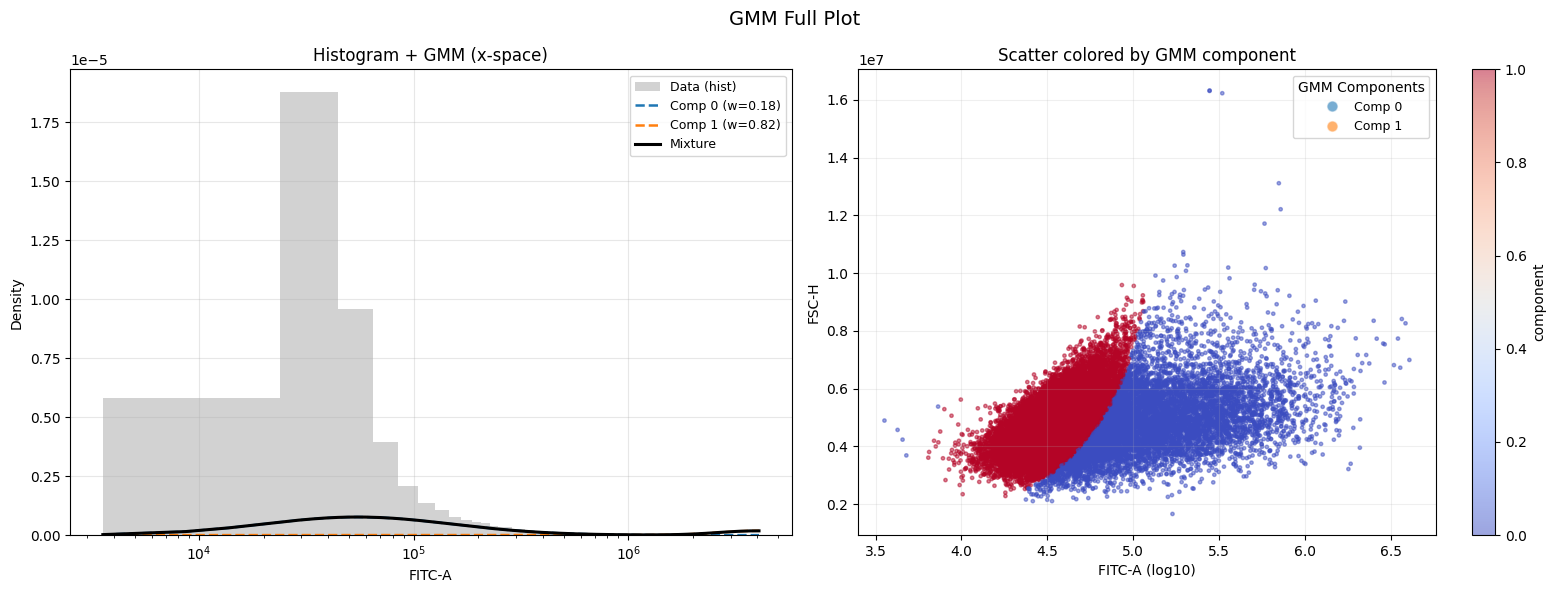

[{'comp': 0, 'count': 7798, 'pct': 31.00349872773537},
 {'comp': 1, 'count': 17354, 'pct': 68.99650127226464}]

In [106]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from scipy.stats import norm
import joblib
from pathlib import Path

class FlowGMMSelector:
    """
    Универсальный селектор на основе GMM:
      - поддерживает одномерную (FITC-A) и двумерную (FITC-A, FSC-H) модели
      - безопасное лог-преобразование (log1p) с фильтрацией NaN/inf
      - сохранение/загрузка (joblib)
      - пакетная обработка папок с логированием (index/path/infectivity%)
    """

    def __init__(self, n_components=2, log=True, eps_shift=1e-9):
        self.n_components = int(n_components)
        self.log = bool(log)
        self.eps_shift = float(eps_shift)

        # модели и метаданные
        self.gmm_1d = None
        self.right_comp_1d = None

        self.gmm_2d = None
        self.right_comp_2d = None

        self._fitted_1d = False
        self._fitted_2d = False

    # ---------------- save/load ----------------
    def save(self, path):
        path = Path(path)
        path.parent.mkdir(parents=True, exist_ok=True)
        joblib.dump(self, path)
        return path

    @classmethod
    def load(cls, path):
        return joblib.load(path)

    # ---------------- helpers ----------------
    def _safe_log1p(self, arr):
        arr = np.asarray(arr, dtype=float)
        arr_safe = arr + self.eps_shift
        arr_safe[arr_safe <= 0] = np.nan
        return np.log1p(arr_safe)

    def _clean_1d_input(self, x):
        x = np.asarray(x, dtype=float)
        if self.log:
            z = self._safe_log1p(x)
        else:
            z = x.copy()
        mask = np.isfinite(z)
        return z[mask], mask  # z in log-space, mask on original array (True where valid after log)

    def _clean_2d_input(self, x, y):
        x = np.asarray(x, dtype=float)
        y = np.asarray(y, dtype=float)
        if self.log:
            zx = self._safe_log1p(x)
            zy = self._safe_log1p(y)
        else:
            zx = x.copy()
            zy = y.copy()
        mask = np.isfinite(zx) & np.isfinite(zy)
        Z = np.vstack([zx[mask], zy[mask]]).T if mask.any() else np.empty((0,2))
        return Z, mask

    # ---------------- fit ----------------
    def fit_1d(self, x, n_components=None, random_state=0):
        n_comp = self.n_components if n_components is None else int(n_components)
        z, mask = self._clean_1d_input(x)
        if z.size < n_comp:
            raise ValueError(f"Недостаточно валидных точек после фильтрации: {z.size} < n_components={n_comp}")
        self.gmm_1d = GaussianMixture(n_components=n_comp, covariance_type='full', random_state=random_state)
        self.gmm_1d.fit(z.reshape(-1,1))
        self.right_comp_1d = int(np.argmax(self.gmm_1d.means_.ravel()))
        self._fitted_1d = True
        return self

    def fit_2d(self, x, y, n_components=None, random_state=0):
        n_comp = self.n_components if n_components is None else int(n_components)
        Z, mask = self._clean_2d_input(x, y)
        if Z.shape[0] < n_comp:
            raise ValueError(f"Недостаточно валидных точек после фильтрации: {Z.shape[0]} < n_components={n_comp}")
        self.gmm_2d = GaussianMixture(n_components=n_comp, covariance_type='full', random_state=random_state)
        self.gmm_2d.fit(Z)
        # right component by largest mean on first feature (FITC-A)
        self.right_comp_2d = int(np.argmax(self.gmm_2d.means_[:, 0]))
        self._fitted_2d = True
        return self

    # ---------------- predict ----------------
    def predict_1d(self, x_new):
        if not self._fitted_1d:
            raise RuntimeError("1D GMM не обучен. Вызовите fit_1d(...)")
        x_new = np.asarray(x_new, dtype=float)
        labels_full = np.full(len(x_new), -1, dtype=int)
        z, mask_valid = self._clean_1d_input(x_new)  # z only valid entries
        if z.size == 0:
            return labels_full
        labels_pred = self.gmm_1d.predict(z.reshape(-1,1))
        # map predicted component -> boolean right(1)/left(0) or keep comp id? We use 1 for right, 0 for other comp ids
        right_mask = (labels_pred == self.right_comp_1d).astype(int)
        # put back into full-length array
        valid_idx = np.nonzero(mask_valid)[0]
        labels_full[valid_idx] = right_mask
        return labels_full

    def predict_2d(self, x_new, y_new):
        if not self._fitted_2d:
            raise RuntimeError("2D GMM не обучен. Вызовите fit_2d(...)")
        x_new = np.asarray(x_new, dtype=float)
        y_new = np.asarray(y_new, dtype=float)
        n_all = len(x_new)
        labels_full = np.full(n_all, -1, dtype=int)
        Z, mask_valid = self._clean_2d_input(x_new, y_new)
        if Z.shape[0] == 0:
            return labels_full
        labels_pred = self.gmm_2d.predict(Z)
        right_mask = (labels_pred == self.right_comp_2d).astype(int)
        valid_idx = np.nonzero(mask_valid)[0]
        labels_full[valid_idx] = right_mask
        return labels_full

    # convenient unified predict_df: model='1d' or '2d'
    def predict_df(self, df, model='1d', x_col='FITC-A', y_col='FSC-H', label_col=None, inplace=False):
        """
        model: '1d' or '2d' - which model to use for labelling
        label_col: name of column to write. default: 'gmm_right' for 1d, 'gmm_right_2d' for 2d
        """
        if model not in ('1d', '2d'):
            raise ValueError("model must be '1d' or '2d'")
        if model == '1d' and not self._fitted_1d:
            raise RuntimeError("1D model not fitted. Call fit_1d(...)")
        if model == '2d' and not self._fitted_2d:
            raise RuntimeError("2D model not fitted. Call fit_2d(...)")

        df_out = df if inplace else df.copy()

        if model == '1d':
            if label_col is None: label_col = 'gmm_right'
            labels = self.predict_1d(df_out[x_col].to_numpy())
            df_out[label_col] = labels
            return df_out
        else:
            # 2d
            if label_col is None: label_col = 'gmm_right_2d'
            labels = self.predict_2d(df_out[x_col].to_numpy(), df_out[y_col].to_numpy())
            df_out[label_col] = labels
            return df_out

    def get_selected_df(self, df, model='1d', x_col='FITC-A', y_col='FSC-H', label_col=None):
        df_labeled = self.predict_df(df, model=model, x_col=x_col, y_col=y_col, label_col=label_col, inplace=False)
        if label_col is None:
            label_col = 'gmm_right' if model == '1d' else 'gmm_right_2d'
        return df_labeled[df_labeled[label_col] == 1].copy()

    # ---------------- batch processing / folder helpers ----------------
    def process_folder(self,
                       in_dir,
                       out_dir="gmm_results",
                       model='1d',
                       x_col="FITC-A",
                       y_col="FSC-H",
                       recursive=False,
                       sample_frac_for_plot=0.05,
                       sample_cap=200_000,
                       biexp=False,
                       min_rows=0):
        """
        Обработать все файлы в папке:
          - сохранить labelled parquet
          - сохранить figure (left: hist+components, right: FSC-H vs FITC-A)
          - собирать summary csv с infectivity percent и counts per component
        model = '1d' or '2d' (which model used for labelling and comp counts)
        """
        in_dir = Path(in_dir)
        out_dir = Path(out_dir)
        out_dir.mkdir(parents=True, exist_ok=True)

        pattern = "**/*" if recursive else "*"
        exts = [".parquet", ".pq", ".csv", ".txt"]
        files = sorted([fp for fp in in_dir.glob(pattern) if fp.suffix.lower() in exts])
        if not files:
            print("No files found in", in_dir)
            return pd.DataFrame()

        N = len(files)
        rows = []
        rng = np.random.RandomState(0)

        for i, fp in enumerate(files, start=1):
            print(f"[{i}/{N}] {fp} ...", end=" ")
            try:
                if fp.suffix.lower() in [".parquet", ".pq"]:
                    df = pd.read_parquet(fp)
                else:
                    df = pd.read_csv(fp)
            except Exception as e:
                print("read error:", e); continue

            total = len(df)
            if total < min_rows:
                print(f"skipped (rows {total} < {min_rows})"); continue

            # predict and store label column name
            label_col = 'gmm_right' if model == '1d' else 'gmm_right_2d'
            df_labeled = self.predict_df(df, model=model, x_col=x_col, y_col=y_col, label_col=label_col, inplace=False)

            selected = int((df_labeled[label_col] == 1).sum())
            infectivity_percent = 100.0 * selected / total if total > 0 else 0.0
            print(f"infectivity {infectivity_percent:.2f}%")

            # save labeled parquet
            out_parq = out_dir / f"{fp.stem}_gmm.parquet"
            df_labeled.to_parquet(out_parq, index=False)

            # plotting sample
            sample_n = min(int(total * sample_frac_for_plot), sample_cap)
            if sample_n < total:
                idx_plot = rng.choice(total, size=sample_n, replace=False)
                df_plot = df_labeled.iloc[idx_plot]
            else:
                df_plot = df_labeled

            out_png = out_dir / f"{fp.stem}_gmm.png"
            try:
                self.plot_gmm_full_figure(df_plot, model=model, col_x=x_col, col_y=y_col,
                                          title=f"{fp.name} — selected {selected}/{total} ({infectivity_percent:.2f}%)",
                                          biexp=biexp, out_path=out_png)
            except Exception as e:
                print("plot failed:", e)

            # detailed stats using the model's internal GMM (in model's feature-space)
            if model == '1d':
                x_all = df_labeled[x_col].to_numpy()
                mask = np.isfinite(x_all) & (x_all > 0)
                x_valid = x_all[mask]
                if x_valid.size > 0:
                    comps = self.gmm_1d.predict(np.log1p(x_valid).reshape(-1,1))
                    uniq, cnt = np.unique(comps, return_counts=True)
                else:
                    uniq, cnt = np.array([], dtype=int), np.array([], dtype=int)
            else:
                x_all = df_labeled[x_col].to_numpy()
                y_all = df_labeled[y_col].to_numpy()
                mask = np.isfinite(x_all) & np.isfinite(y_all) & (x_all > 0)
                Z_valid = np.vstack([np.log1p(x_all[mask]), np.log1p(y_all[mask])]).T if mask.any() else np.empty((0,2))
                if Z_valid.shape[0] > 0:
                    comps = self.gmm_2d.predict(Z_valid)
                    uniq, cnt = np.unique(comps, return_counts=True)
                else:
                    uniq, cnt = np.array([], dtype=int), np.array([], dtype=int)

            stats = {"file": str(fp), "rows": int(total), "selected": int(selected), "infectivity_percent": float(infectivity_percent)}
            for u, c in zip(uniq, cnt):
                stats[f"comp_{int(u)}_count"] = int(c)
                stats[f"comp_{int(u)}_pct"] = float(c / max(1, (uniq.sum()+cnt.sum())) )  # fallback (not used much)
            rows.append(stats)

        summary = pd.DataFrame(rows)
        summary_path = out_dir / "summary_gmm.csv"
        summary.to_csv(summary_path, index=False)
        print("\nSummary saved to:", summary_path)
        return summary

    def predict_folder_only_labels(self,
                                   in_dir,
                                   out_dir="gmm_labels",
                                   model='1d',
                                   x_col="FITC-A",
                                   recursive=False,
                                   min_rows=0):
        """
        Только метки: прочитать файлы в папке, добавить колонку меток и сохранить.
        Логирование: индекс/всего/infectivity_percent.
        """
        in_dir = Path(in_dir)
        out_dir = Path(out_dir); out_dir.mkdir(parents=True, exist_ok=True)

        pattern = "**/*" if recursive else "*"
        exts = [".parquet", ".pq", ".csv", ".txt"]
        files = sorted([fp for fp in in_dir.glob(pattern) if fp.suffix.lower() in exts])
        if not files:
            print("No files found.")
            return pd.DataFrame()

        N = len(files)
        rows = []

        for i, fp in enumerate(files, start=1):
            print(f"[{i}/{N}] Processing: {fp}", end=" ")
            try:
                if fp.suffix.lower() in [".parquet", ".pq"]:
                    df = pd.read_parquet(fp)
                else:
                    df = pd.read_csv(fp)
            except Exception as e:
                print("read error:", e); continue

            total = len(df)
            if total < min_rows:
                print(f"skipped ({total} < {min_rows})"); continue

            label_col = 'gmm_right' if model == '1d' else 'gmm_right_2d'
            df_labeled = self.predict_df(df, model=model, x_col=x_col, y_col="FSC-H", label_col=label_col, inplace=False)

            selected = int((df_labeled[label_col] == 1).sum())
            infectivity_percent = 100.0 * selected / total if total > 0 else 0.0
            print(f"infectivity {infectivity_percent:.2f}%")

            out_parq = out_dir / f"{fp.stem}_labels.parquet"
            df_labeled.to_parquet(out_parq, index=False)

            # detailed per-component stats (if possible)
            if model == '1d':
                x_all = df_labeled[x_col].to_numpy()
                mask = np.isfinite(x_all) & (x_all > 0)
                if mask.sum() > 0:
                    comps = self.gmm_1d.predict(np.log1p(x_all[mask]).reshape(-1,1))
                    uniq, cnt = np.unique(comps, return_counts=True)
                else:
                    uniq, cnt = np.array([], dtype=int), np.array([], dtype=int)
            else:
                x_all = df_labeled[x_col].to_numpy(); y_all = df_labeled["FSC-H"].to_numpy()
                mask = np.isfinite(x_all) & np.isfinite(y_all) & (x_all > 0)
                if mask.sum() > 0:
                    Z = np.vstack([np.log1p(x_all[mask]), np.log1p(y_all[mask])]).T
                    comps = self.gmm_2d.predict(Z)
                    uniq, cnt = np.unique(comps, return_counts=True)
                else:
                    uniq, cnt = np.array([], dtype=int), np.array([], dtype=int)

            stats = {"file": str(fp), "rows": int(total), "selected": int(selected), "infectivity_percent": float(infectivity_percent)}
            for u, c in zip(uniq, cnt):
                stats[f"comp_{int(u)}_count"] = int(c)
                stats[f"comp_{int(u)}_pct"] = float(c / max(1, len(comps)) * 100.0) if len(comps) > 0 else 0.0
            rows.append(stats)

        summary = pd.DataFrame(rows)
        summary.to_csv(out_dir / "summary_labels.csv", index=False)
        print("\nSummary saved:", out_dir / "summary_labels.csv")
        return summary

    # ---------------- plotting ----------------
    def plot_gmm_full_figure(self, df, model='1d', col_x='FITC-A', col_y='FSC-H', title="GMM Full Plot", biexp=False, out_path=None):
        """
        Рисует левый subplot: histogram (x-space) + компонентные кривые и mixture,
        правый subplot: scatter (FSC-H vs FITC-A) с окраской по component (используем component IDs из соответствующей модели).
        """
        from matplotlib.lines import Line2D
        if model == '1d' and not self._fitted_1d:
            raise RuntimeError("1D model not fitted.")
        if model == '2d' and not self._fitted_2d:
            raise RuntimeError("2D model not fitted.")

        x_raw = df[col_x].to_numpy()
        y_raw = df[col_y].to_numpy() if col_y in df.columns else np.full(len(df), np.nan)
        label_col = 'gmm_right' if model == '1d' else 'gmm_right_2d'
        labels_raw = df.get(label_col, np.full(len(df), -1)).to_numpy()

        mask_valid = np.isfinite(x_raw) & np.isfinite(y_raw) & (x_raw > 0)
        x = x_raw[mask_valid]
        y = y_raw[mask_valid]
        labels = labels_raw[mask_valid].astype(int)

        if x.size == 0:
            raise ValueError("Нет валидных точек для plotting.")

        # prepare GMM params and transform to x-space
        if model == '1d':
            gmm = self.gmm_1d
        else:
            gmm = self.gmm_2d

        # grid in x-space, evaluate pdf in z=log1p(x) then convert using jacobian
        xs = np.linspace(x.min(), x.max(), 800)
        zs = np.log1p(xs).reshape(-1, 1)

        n_comp = gmm.n_components
        weights = gmm.weights_.ravel()
        means = gmm.means_.ravel()
        covs = gmm.covariances_
        if covs.ndim == 1:
            vars_ = covs
        elif covs.ndim == 2 and covs.shape[1] == 1:
            vars_ = covs[:, 0]
        else:
            vars_ = covs.reshape(n_comp, -1)[:, 0]
        sigmas = np.sqrt(vars_)

        pdfs_z = np.zeros((zs.shape[0], n_comp))
        for k in range(n_comp):
            pdfs_z[:, k] = weights[k] * norm.pdf(zs.ravel(), loc=means[k], scale=sigmas[k])
        jac = 1.0 / (1.0 + xs)
        pdfs_x = pdfs_z * jac[:, None]
        pdf_mix_x = pdfs_x.sum(axis=1)

        # plot
        fig, axes = plt.subplots(1, 2, figsize=(16,6))

        ax = axes[0]
        ax.hist(x, bins=200, density=True, alpha=0.35, color="gray", label="Data (hist)")
        colors = plt.cm.tab10(np.arange(n_comp))
        for k in range(n_comp):
            ax.plot(xs, pdfs_x[:, k], linestyle='--', linewidth=1.8, color=colors[k], label=f"Comp {k} (w={weights[k]:.2f})")
        ax.plot(xs, pdf_mix_x, linewidth=2.2, color="black", label="Mixture")
        ax.set_xlabel(col_x)
        ax.set_xscale("log")
        ax.set_ylabel("Density")
        ax.set_title("Histogram + GMM (x-space)")
        ax.legend(fontsize=9)
        ax.grid(alpha=0.3)

        ax2 = axes[1]
        if biexp:
            def biexp_transform(v, w=0.5, a=4.5):
                return np.sign(v) * (np.log(1 + w * np.abs(v)) / a)
            x_plot = biexp_transform(x)
            xlabel = f"{col_x} (biexp)"
        else:
            x_plot = np.log10(x)
            xlabel = f"{col_x} (log10)"
        # color by component predicted in model-space
        if model == '1d':
            comp_ids = gmm.predict(np.log1p(x).reshape(-1,1))
        else:
            comp_ids = gmm.predict(np.vstack([np.log1p(x), np.log1p(y)]).T)
        sc = ax2.scatter(x_plot, y, c=comp_ids, cmap="coolwarm", s=6, alpha=0.5)

        # --- Легенда для scatter --- 
        handles = [Line2D([0], [0], marker='o', color='w', label=f'Comp {i}', markerfacecolor=colors[i], markersize=8, alpha=0.6) for i in range(n_comp)] 
        ax2.legend(handles=handles, title="GMM Components", fontsize=9)
        ax2.set_xlabel(xlabel)
        ax2.set_ylabel(col_y)
        ax2.set_title("Scatter colored by GMM component")
        ax2.grid(alpha=0.2)
        plt.colorbar(sc, ax=ax2, label="component")

        fig.suptitle(title, fontsize=14)
        plt.tight_layout()

        if out_path is not None:
            Path(out_path).parent.mkdir(parents=True, exist_ok=True)
            fig.savefig(out_path, dpi=180, bbox_inches="tight")
            plt.close(fig)
        else:
            plt.show()

        # return stats
        comp_labels = gmm.predict(np.log1p(x).reshape(-1,1)) if model=='1d' else gmm.predict(np.vstack([np.log1p(x), np.log1p(y)]).T)
        total = len(comp_labels)
        counts = np.bincount(comp_labels, minlength=n_comp)
        stats = [{"comp": int(i), "count": int(counts[i]), "pct": float(counts[i]/total*100.0)} for i in range(n_comp)]
        return stats

# ---------------- Example usage ----------------
from pathlib import Path
# пути к файлам (подставь свои)
# train_path = Path("E:\\parquet\\parsed_data\\fsc-h_fsc-a\\KP.2_KiH-7-57_8_1584903b-ce9a-11f0-b757-f02f74d321c5_filtered_filtered.parquet")
# test_path  = Path("E:\\parquet\\parsed_data\\fsc-h_fsc-a\\KP.3.1.1_58-18-57-Fc_D9_bb677317-ce99-11f0-9b2d-f02f74d321c5_filtered_filtered.parquet")

train_path = Path("E:\\parquet\\parsed_data\\fsc-h_fsc-a\\KP.3.1.1_58-18-57-Fc_D9_bb677317-ce99-11f0-9b2d-f02f74d321c5_filtered_filtered.parquet")
test_path  = Path("E:\\parquet\\parsed_data\\fsc-h_fsc-a\\KP.2_KiH-7-57_8_1584903b-ce9a-11f0-b757-f02f74d321c5_filtered_filtered.parquet")

# train_df = pd.read_parquet(Path("E:\\parquet\\parsed_data\\fsc-h_fsc-a\\KP.3.1.1_58-18-57-Fc_D9_bb677317-ce99-11f0-9b2d-f02f74d321c5_filtered_filtered.parquet")).dropna()
# test_df = pd.read_parquet(Path("E:\\parquet\\parsed_data\\fsc-h_fsc-a\\KP.2_KiH-7-57_8_1584903b-ce9a-11f0-b757-f02f74d321c5_filtered_filtered.parquet")).dropna()

# load data
train_df = pd.read_parquet(train_path).dropna()
test_df = pd.read_parquet(test_path).dropna()

selector = FlowGMMSelector(n_components=2, log=True)
# selector.fit_1d(train_df['FITC-A'].to_numpy())
selector.fit_2d(train_df['FITC-A'].to_numpy(), train_df['FSC-H'].to_numpy())
selector.save("models/fitc-a_fsc-h_gmm_selector_2.joblib")

selector = FlowGMMSelector.load("models/fitc-a_fsc-h_gmm_selector_2.joblib")
df_labeled = selector.predict_df(test_df, model='2d', x_col='FITC-A')
selector.plot_gmm_full_figure(df_labeled, model='2d', col_x='FITC-A', col_y='FSC-H')


In [ ]:
# 3. прогон по файлам
files = [
    "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\JN.1_7-35-57_7_a772f627-ce99-11f0-90bd-f02f74d321c5_1_2.parquet", 
    "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\KP.3.1.1_58-18-57-Fc_D9_bb677317-ce99-11f0-9b2d-f02f74d321c5_1_2.parquet", 
    "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\EG.5_58-10-57_4_08abcc31-ce9a-11f0-b2e5-f02f74d321c5_1_2.parquet",
    "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\KP.2_58-N-57_9_108af62e-ce9a-11f0-822d-f02f74d321c5_1_2.parquet",
    "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\XFG_57-18-H18K(sa55)_B4_24d3a807-ce9a-11f0-81c2-f02f74d321c5_1_2.parquet",
    "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\XFG_XFG_SA55_A10_41e5b654-ce9a-11f0-bfa6-f02f74d321c5_1_2.parquet",
    "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\NB.1.8.1_58-35-H15K_A8_df8a8c82-ce99-11f0-8b9a-f02f74d321c5_1_2.parquet",
]

# files = [
#     "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\NB.1.8.1_58-35-H15K_A1_ddd4515e-ce99-11f0-a41c-f02f74d321c5_filtered_filtered.parquet",
#     "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\NB.1.8.1_58-35-H15K_A2_de4fa62b-ce99-11f0-aab4-f02f74d321c5_filtered_filtered.parquet",
#     "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\NB.1.8.1_58-35-H15K_A3_de8cd28d-ce99-11f0-9051-f02f74d321c5_filtered_filtered.parquet",
#     "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\NB.1.8.1_58-35-H15K_A4_ded389fa-ce99-11f0-bde4-f02f74d321c5_filtered_filtered.parquet",
#     "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\NB.1.8.1_58-35-H15K_A5_df0e63b6-ce99-11f0-8a20-f02f74d321c5_filtered_filtered.parquet",
#     "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\NB.1.8.1_58-35-H15K_A6_df4984c2-ce99-11f0-b701-f02f74d321c5_filtered_filtered.parquet",
#     "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\NB.1.8.1_58-35-H15K_A7_df68bc6f-ce99-11f0-94e8-f02f74d321c5_filtered_filtered.parquet",
#     "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\NB.1.8.1_58-35-H15K_A8_df8a8c82-ce99-11f0-8b9a-f02f74d321c5_filtered_filtered.parquet",
#     "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\NB.1.8.1_58-35-H15K_A9_dfadd361-ce99-11f0-be18-f02f74d321c5_filtered_filtered.parquet",
#     "E:\\parquet\\parsed_data\\fsc-h_fsc-a\\NB.1.8.1_58-35-H15K_A10_ddf0e0d7-ce99-11f0-9f46-f02f74d321c5_filtered_filtered.parquet",
# ]

gmm1 = FlowGMMSelector1D.load("models/fitc-a_fsc-h_gmm_selector_1.joblib")

summary = gmm1.process_files_list(files, out_dir="out_from_list",
                                model_paths=model_paths, threshold_pct=35.0)
summary

,file,rows,selected,frac_selected,comp_0_count,comp_0_pct,comp_1_count,comp_1_pct
0,E:\parquet\parsed_data\fsc-h_fsc-a\JN.1_7-35-5...,14813,705,0.047593,14104,95.239381,705,4.760619
1,E:\parquet\parsed_data\fsc-h_fsc-a\KP.3.1.1_58...,33923,33851,0.997878,66,0.194593,33851,99.805407
2,E:\parquet\parsed_data\fsc-h_fsc-a\EG.5_58-10-...,35172,2264,0.064369,32895,93.560681,2264,6.439319
3,E:\parquet\parsed_data\fsc-h_fsc-a\KP.2_58-N-5...,15884,5160,0.324855,10713,67.491967,5160,32.508033
4,E:\parquet\parsed_data\fsc-h_fsc-a\XFG_57-18-H...,33021,5494,0.166379,27527,83.362103,5494,16.637897
5,E:\parquet\parsed_data\fsc-h_fsc-a\XFG_XFG_SA5...,34863,5910,0.169521,28951,83.046958,5910,16.953042
6,E:\parquet\parsed_data\fsc-h_fsc-a\NB.1.8.1_58...,32495,4865,0.149715,27629,85.028005,4865,14.971995


In [113]:
gmm2 = FlowGMMSelector1D.load("models/fitc-a_fsc-h_gmm_selector_2.joblib")

summary = gmm2.process_and_visualize_files(files,
                                            x_col="FITC-A",
                                            y_col="FSC-H",
                                            out_dir="results_gmm",
                                            sample_frac_for_plot=0.05,
                                            sample_cap=200_000,
                                            biexp=False)
summary

,file,rows,selected,frac_selected,comp_0_count,comp_0_pct,comp_1_count,comp_1_pct
0,E:\parquet\parsed_data\fsc-h_fsc-a\JN.1_7-35-5...,17055,11504,0.674524,5523,32.436718,11504,67.563282
1,E:\parquet\parsed_data\fsc-h_fsc-a\KP.3.1.1_58...,36245,4306,0.118803,31933,88.117774,4306,11.882226
2,E:\parquet\parsed_data\fsc-h_fsc-a\EG.5_58-10-...,39658,29196,0.736194,10434,26.328539,29196,73.671461
3,E:\parquet\parsed_data\fsc-h_fsc-a\KP.2_58-N-5...,19185,6815,0.355225,12290,64.328710,6815,35.671290
4,E:\parquet\parsed_data\fsc-h_fsc-a\XFG_57-18-H...,35253,24381,0.691601,10872,30.839929,24381,69.160071
5,E:\parquet\parsed_data\fsc-h_fsc-a\XFG_XFG_SA5...,37140,25324,0.681852,11814,31.811083,25324,68.188917
6,E:\parquet\parsed_data\fsc-h_fsc-a\NB.1.8.1_58...,34762,20296,0.583856,14463,41.609367,20296,58.390633


Processing: E:\parquet\parsed_data\fsc-h_fsc-a\EG.5_57-Fc_1_b80d42dd-ce9a-11f0-aae4-f02f74d321c5_1_2.parquet
   Model 0: infectivity_percent = 4.73%
Processing: E:\parquet\parsed_data\fsc-h_fsc-a\EG.5_57-Fc_2_b999db9e-ce9a-11f0-b466-f02f74d321c5_1_2.parquet
   Model 0: infectivity_percent = 5.50%
Processing: E:\parquet\parsed_data\fsc-h_fsc-a\EG.5_57-Fc_3_bb1a021a-ce9a-11f0-9e64-f02f74d321c5_1_2.parquet
   Model 0: infectivity_percent = 5.37%
Processing: E:\parquet\parsed_data\fsc-h_fsc-a\EG.5_57-Fc_4_bc986e81-ce9a-11f0-a9d9-f02f74d321c5_1_2.parquet
   Model 0: infectivity_percent = 5.85%
Processing: E:\parquet\parsed_data\fsc-h_fsc-a\EG.5_57-Fc_5_be122ebb-ce9a-11f0-acf3-f02f74d321c5_1_2.parquet
   Model 0: infectivity_percent = 5.42%
Processing: E:\parquet\parsed_data\fsc-h_fsc-a\EG.5_57-Fc_6_bf908d79-ce9a-11f0-b2af-f02f74d321c5_1_2.parquet
   Model 0: infectivity_percent = 5.68%
Processing: E:\parquet\parsed_data\fsc-h_fsc-a\EG.5_57-Fc_7_c11ea526-ce9a-11f0-bd6b-f02f74d321c5_1_2.parqu

KeyboardInterrupt: 

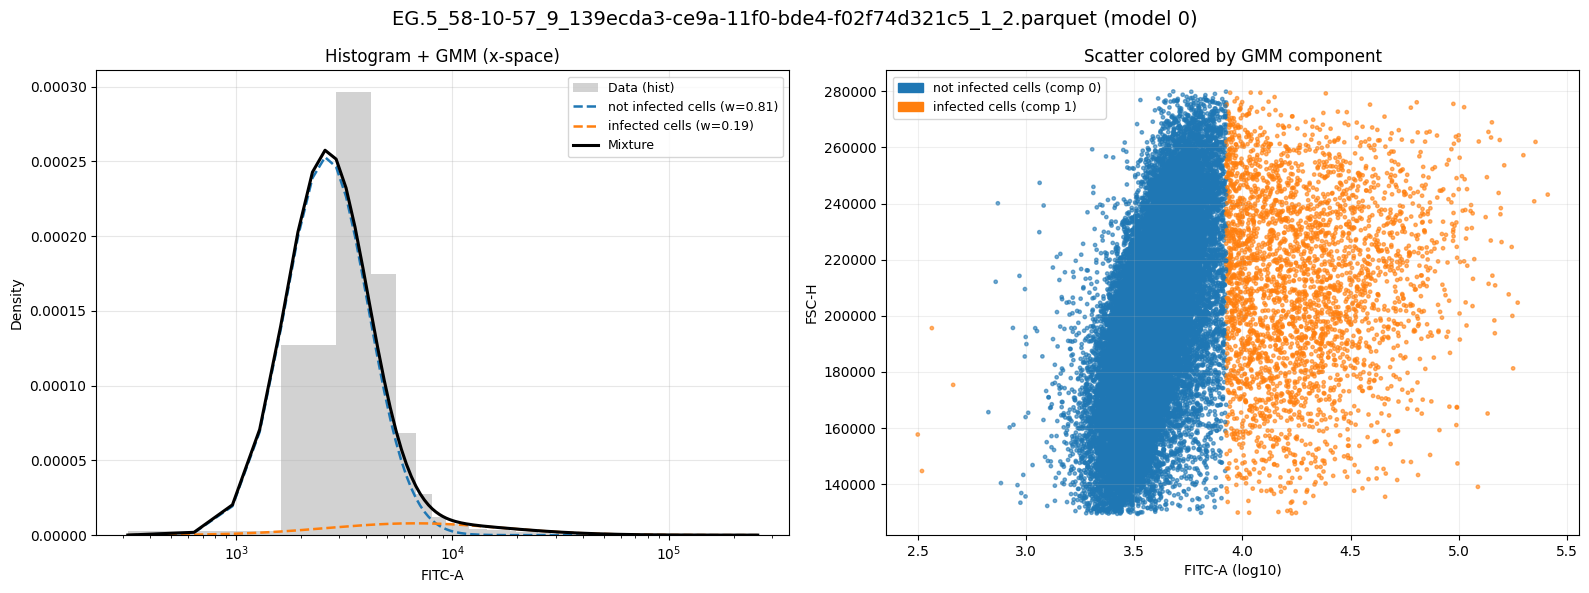

In [136]:
# gmm2 = FlowGMMSelector1D.load("models/fitc-a_fsc-h_gmm_selector_2.joblib")

model_paths = [
    "models/fitc-a_fsc-h_gmm_selector_1.joblib",
    "models/fitc-a_fsc-h_gmm_selector_2.joblib"
]

import glob

files = glob.glob("E:/parquet/parsed_data/fsc-h_fsc-a/*.parquet")

res = gmm2.process_files_list(
    # in_dir="E:/parquet/parsed_data/fsc-h_fsc-a",
    file_paths=files,
    out_dir="E:/parquet/parsed_data/fitc-a_fsc-h",
    x_col="FITC-A", 
    model_paths=model_paths, 
    threshold_pct=35.0
    )

# summary = gmm2.process_files_list(files, out_dir="out_from_list",
#                                 model_paths=model_paths, threshold_pct=35.0)
res

In [64]:
df = pd.read_parquet("E:/parquet/parsed_data/fitc-a_fsc-h/EG.5_57-Fc_1_b80d42dd-ce9a-11f0-aae4-f02f74d321c5_filtered_filtered_gmm.parquet")
df

,FSC-H,SSC-H,FITC-H,FSC-A,SSC-A,FITC-A,label,FITC_raw,FITC_log10,FITC_asinh,FITC_pct,FITC_z_robust,FSC_ratio,SSC_ratio,gmm_prob_infected,cluster_label,gmm_right
0,358565.0,524272.0,391.0,14077624.00,39374152.00,3236.41,False,3236.41,3.510198,1.890668,0.45083,-0.167783,39.261010,75.102527,0.943991,0,0
1,311360.0,254740.0,462.0,12147157.00,15270262.00,2141.81,False,2141.81,3.330984,1.505314,0.20198,-1.466030,39.013223,59.944500,0.836430,0,0
2,269012.0,108377.0,583.0,10182537.00,4629616.00,3084.88,False,3084.88,3.489379,1.844952,0.40862,-0.318595,37.851609,42.717698,0.940127,0,0
3,400382.0,173506.0,396.0,14884179.00,4443297.00,4647.59,False,4647.59,3.667321,2.240874,0.75108,0.970439,37.174945,25.608895,0.941849,0,0
4,356632.0,524272.0,403.0,14048322.00,39130324.00,4350.63,False,4350.63,3.638652,2.176422,0.70656,0.762755,39.391647,74.637448,0.946227,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37208,147723.0,98058.0,4588.0,898822.94,620919.19,29449.53,True,29449.53,4.469093,4.076113,0.99164,6.778570,6.084516,6.332162,0.000002,0,1
37209,195216.0,151397.0,522.0,1089533.75,828585.50,3093.97,False,3093.97,3.490656,1.847751,0.41095,-0.309342,5.581170,5.472932,0.940400,0,0
37210,234919.0,145274.0,619.0,1370400.50,852225.13,3829.97,False,3829.97,3.583309,2.052627,0.60488,0.361843,5.833502,5.866329,0.949418,0,0
37211,206686.0,216039.0,721.0,1180494.50,1177217.75,4335.31,False,4335.31,3.637120,2.172984,0.70368,0.751660,5.711536,5.449098,0.946404,0,0
